In [2]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Actual data
df = pd.read_csv('application_data.csv')
pd.options.display.max_columns=122
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.shape

(307511, 122)

In [8]:
# Missing values
pd.options.display.max_rows=307511
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
#percentage null values:
((1-df.count()/len(df))*100).round()

SK_ID_CURR                       0.0
TARGET                           0.0
NAME_CONTRACT_TYPE               0.0
CODE_GENDER                      0.0
FLAG_OWN_CAR                     0.0
FLAG_OWN_REALTY                  0.0
CNT_CHILDREN                     0.0
AMT_INCOME_TOTAL                 0.0
AMT_CREDIT                       0.0
AMT_ANNUITY                      0.0
AMT_GOODS_PRICE                  0.0
NAME_TYPE_SUITE                  0.0
NAME_INCOME_TYPE                 0.0
NAME_EDUCATION_TYPE              0.0
NAME_FAMILY_STATUS               0.0
NAME_HOUSING_TYPE                0.0
REGION_POPULATION_RELATIVE       0.0
DAYS_BIRTH                       0.0
DAYS_EMPLOYED                    0.0
DAYS_REGISTRATION                0.0
DAYS_ID_PUBLISH                  0.0
OWN_CAR_AGE                     66.0
FLAG_MOBIL                       0.0
FLAG_EMP_PHONE                   0.0
FLAG_WORK_PHONE                  0.0
FLAG_CONT_MOBILE                 0.0
FLAG_PHONE                       0.0
F

In [5]:
#dropping columns with null values more than 30%:
dropnull_df=df.dropna(thresh=df.shape[0]*0.7,how='all',axis=1)
dropnull_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [6]:
#dropping rows having more than 30% null
dropnullr_df=dropnull_df[dropnull_df.isnull().sum(axis=1)!=22]
dropnullr_df.shape

(307511, 72)

In [12]:
#gathering information about null values:
dropnull_df.shape

(307511, 72)

In [13]:
dropnull_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [14]:
dropnull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [15]:
#crosschecking null values:
dropnull_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [16]:
#checking for unique values to identify objects:
dropnull_df.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
NAME_CONTRAC

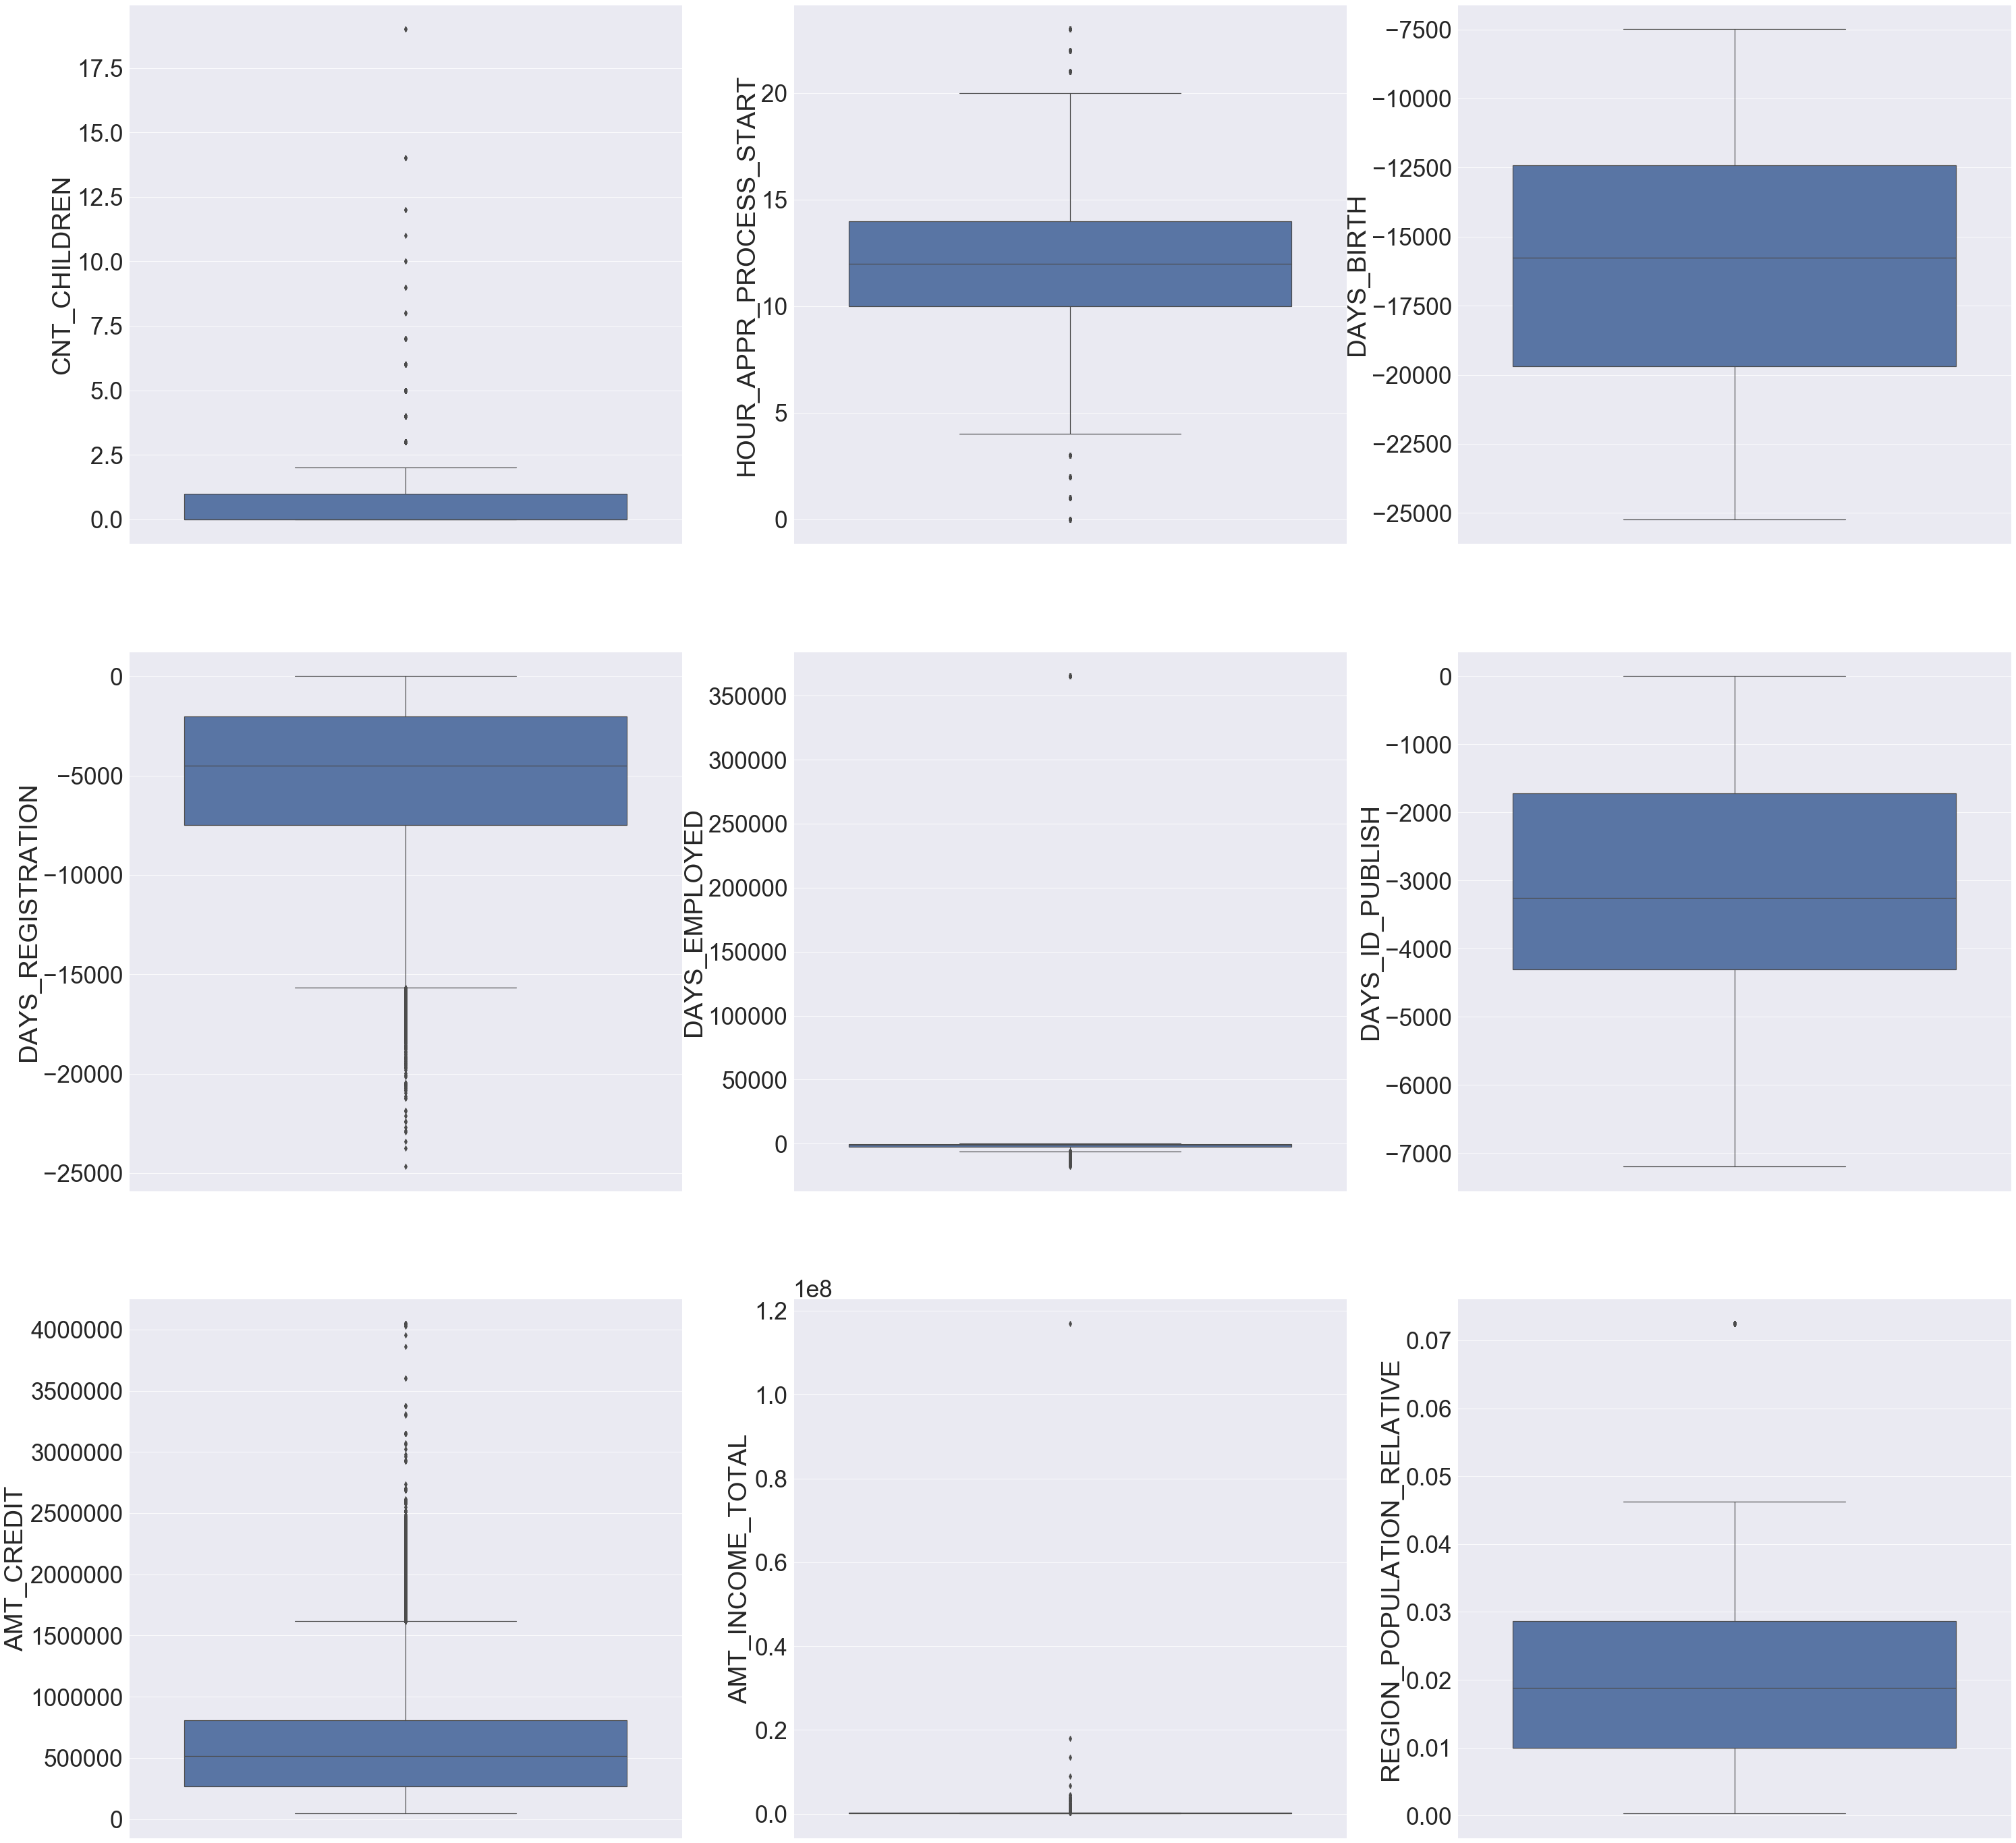

In [18]:
sns.set(style='darkgrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=4)                                                  
plt.figure(figsize=(50, 50))                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 9)
plt.subplot(3,3,1)
sns.boxplot(y = 'CNT_CHILDREN', data = dropnull_df)
plt.subplot(3,3,2)
sns.boxplot(y = 'HOUR_APPR_PROCESS_START', data = dropnull_df)
plt.subplot(3,3,3)
sns.boxplot(y = 'DAYS_BIRTH', data = dropnull_df)
plt.subplot(3,3,4)
sns.boxplot(y = 'DAYS_REGISTRATION', data = dropnull_df)
plt.subplot(3,3,5)
sns.boxplot(y = 'DAYS_EMPLOYED', data = dropnull_df)
plt.subplot(3,3,6)
sns.boxplot(y = 'DAYS_ID_PUBLISH', data = dropnull_df)
plt.subplot(3,3,7)
sns.boxplot(y = 'AMT_CREDIT', data = dropnull_df)
plt.subplot(3,3,8)
sns.boxplot(y = 'AMT_INCOME_TOTAL', data = dropnull_df)
plt.subplot(3,3,9)
sns.boxplot(y = 'REGION_POPULATION_RELATIVE', data = dropnull_df)

In [19]:
#data imbalance for TARGET variable / column
100*dropnull_df['TARGET'].value_counts(normalize=True).round(2)

0    92.0
1     8.0
Name: TARGET, dtype: float64

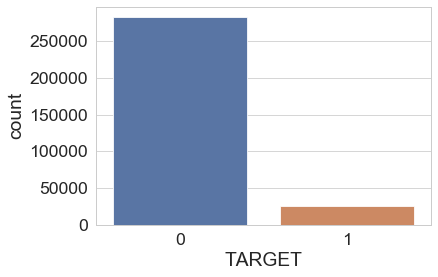

In [7]:
#plotting data imbalnce:
sns.set(style='whitegrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=2)                                                                                                                                                                                                                                                                                
color = sns.color_palette("Set2", 9)
sns.countplot(x = 'TARGET', data = dropnull_df)

In [8]:
df_1 = dropnull_df[dropnull_df['TARGET'] == 1]

In [22]:
df_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120           1               1                0   
26            -1827           1               1                0   
40            -1029           1               1                0   
42            -4409           1               1                1   
81            -4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                  1           1           0              1.0   
26                 1           0           0              1.0   
40                 1           0           0              2.0   
42                 1           1           0              2.0   
81                 1           0           0              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                     

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 72 columns):
SK_ID_CURR                     24825 non-null int64
TARGET                         24825 non-null int64
NAME_CONTRACT_TYPE             24825 non-null object
CODE_GENDER                    24825 non-null object
FLAG_OWN_CAR                   24825 non-null object
FLAG_OWN_REALTY                24825 non-null object
CNT_CHILDREN                   24825 non-null int64
AMT_INCOME_TOTAL               24825 non-null float64
AMT_CREDIT                     24825 non-null float64
AMT_ANNUITY                    24825 non-null float64
AMT_GOODS_PRICE                24804 non-null float64
NAME_TYPE_SUITE                24755 non-null object
NAME_INCOME_TYPE               24825 non-null object
NAME_EDUCATION_TYPE            24825 non-null object
NAME_FAMILY_STATUS             24825 non-null object
NAME_HOUSING_TYPE              24825 non-null object
REGION_POPULATION_RELATIVE     24825 non-

In [20]:
df_1.shape

(24825, 72)

In [21]:
df_1.nunique().sort_values()

TARGET                             1
FLAG_MOBIL                         1
FLAG_DOCUMENT_4                    1
FLAG_DOCUMENT_10                   1
FLAG_DOCUMENT_12                   1
REG_CITY_NOT_LIVE_CITY             2
FLAG_DOCUMENT_8                    2
FLAG_DOCUMENT_16                   2
REG_REGION_NOT_LIVE_REGION         2
REG_REGION_NOT_WORK_REGION         2
LIVE_REGION_NOT_WORK_REGION        2
REG_CITY_NOT_WORK_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
FLAG_DOCUMENT_13                   2
FLAG_DOCUMENT_14                   2
FLAG_PHONE                         2
FLAG_DOCUMENT_11                   2
FLAG_DOCUMENT_2                    2
FLAG_DOCUMENT_3                    2
FLAG_DOCUMENT_5                    2
FLAG_DOCUMENT_6                    2
FLAG_DOCUMENT_7                    2
FLAG_DOCUMENT_15                   2
FLAG_CONT_MOBILE                   2
FLAG_EMAIL                         2
FLAG_EMP_PHONE                     2
NAME_CONTRACT_TYPE                 2
C

In [9]:
df_0 = dropnull_df[dropnull_df['TARGET'] == 0]

In [28]:
df_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   
5             -477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   
5                 1           1           0              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_R

In [29]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     282686 non-null int64
TARGET                         282686 non-null int64
NAME_CONTRACT_TYPE             282686 non-null object
CODE_GENDER                    282686 non-null object
FLAG_OWN_CAR                   282686 non-null object
FLAG_OWN_REALTY                282686 non-null object
CNT_CHILDREN                   282686 non-null int64
AMT_INCOME_TOTAL               282686 non-null float64
AMT_CREDIT                     282686 non-null float64
AMT_ANNUITY                    282674 non-null float64
AMT_GOODS_PRICE                282429 non-null float64
NAME_TYPE_SUITE                281464 non-null object
NAME_INCOME_TYPE               282686 non-null object
NAME_EDUCATION_TYPE            282686 non-null object
NAME_FAMILY_STATUS             282686 non-null object
NAME_HOUSING_TYPE              282686 non-null object
REGION_POPULATION_RELATI

In [30]:
df_0.shape

(282686, 72)

In [31]:
df_0.nunique().sort_values()

TARGET                              1
REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_16                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_PHONE                          2
FLAG_CONT_MOBILE                    2
FLAG_EMAIL                          2
FLAG_EMP_PHONE                      2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR

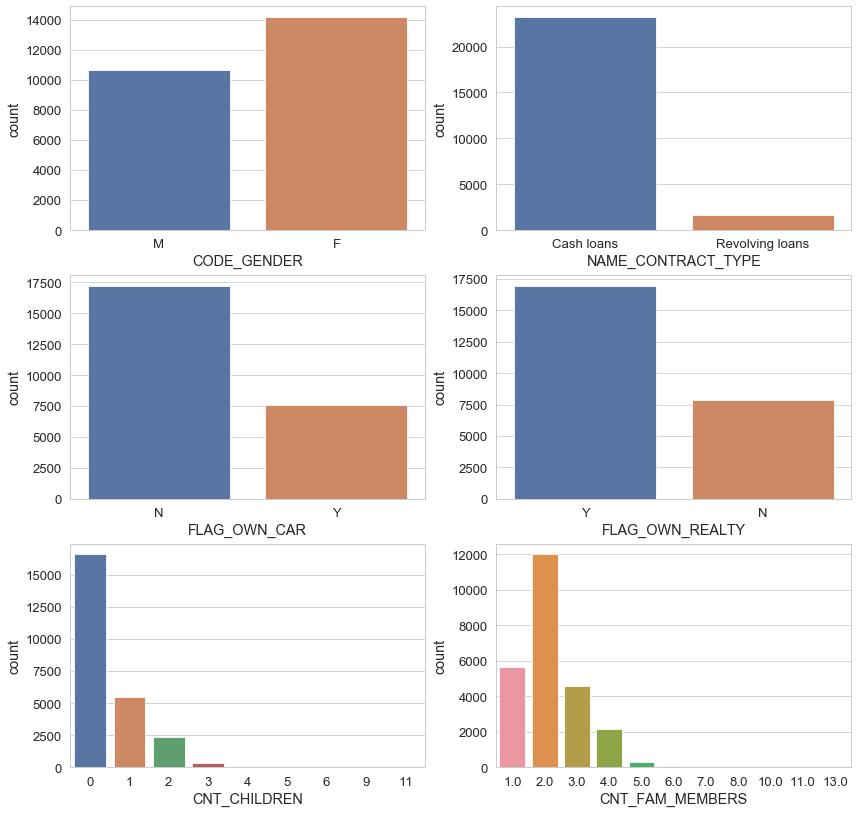

In [24]:
## Bar Plot
# Univariate Categorical on df_1
sns.set(style='whitegrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=1.5)                                                                                                                                                                                                                                                                                
color = sns.color_palette("Set2", 9)
plt.figure(figsize = (14,14))

plt.subplot(3,2,1)
sns.countplot(x = 'CODE_GENDER', data = df_1)

plt.subplot(3,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df_1)

plt.subplot(3,2,3)
sns.countplot(x = 'FLAG_OWN_CAR', data = df_1)

plt.subplot(3,2,4)
sns.countplot(x = 'FLAG_OWN_REALTY', data = df_1)

plt.subplot(3,2,5)
sns.countplot(x = 'CNT_CHILDREN', data = df_1)

plt.subplot(3,2,6)
sns.countplot(x = 'CNT_FAM_MEMBERS', data = df_1)

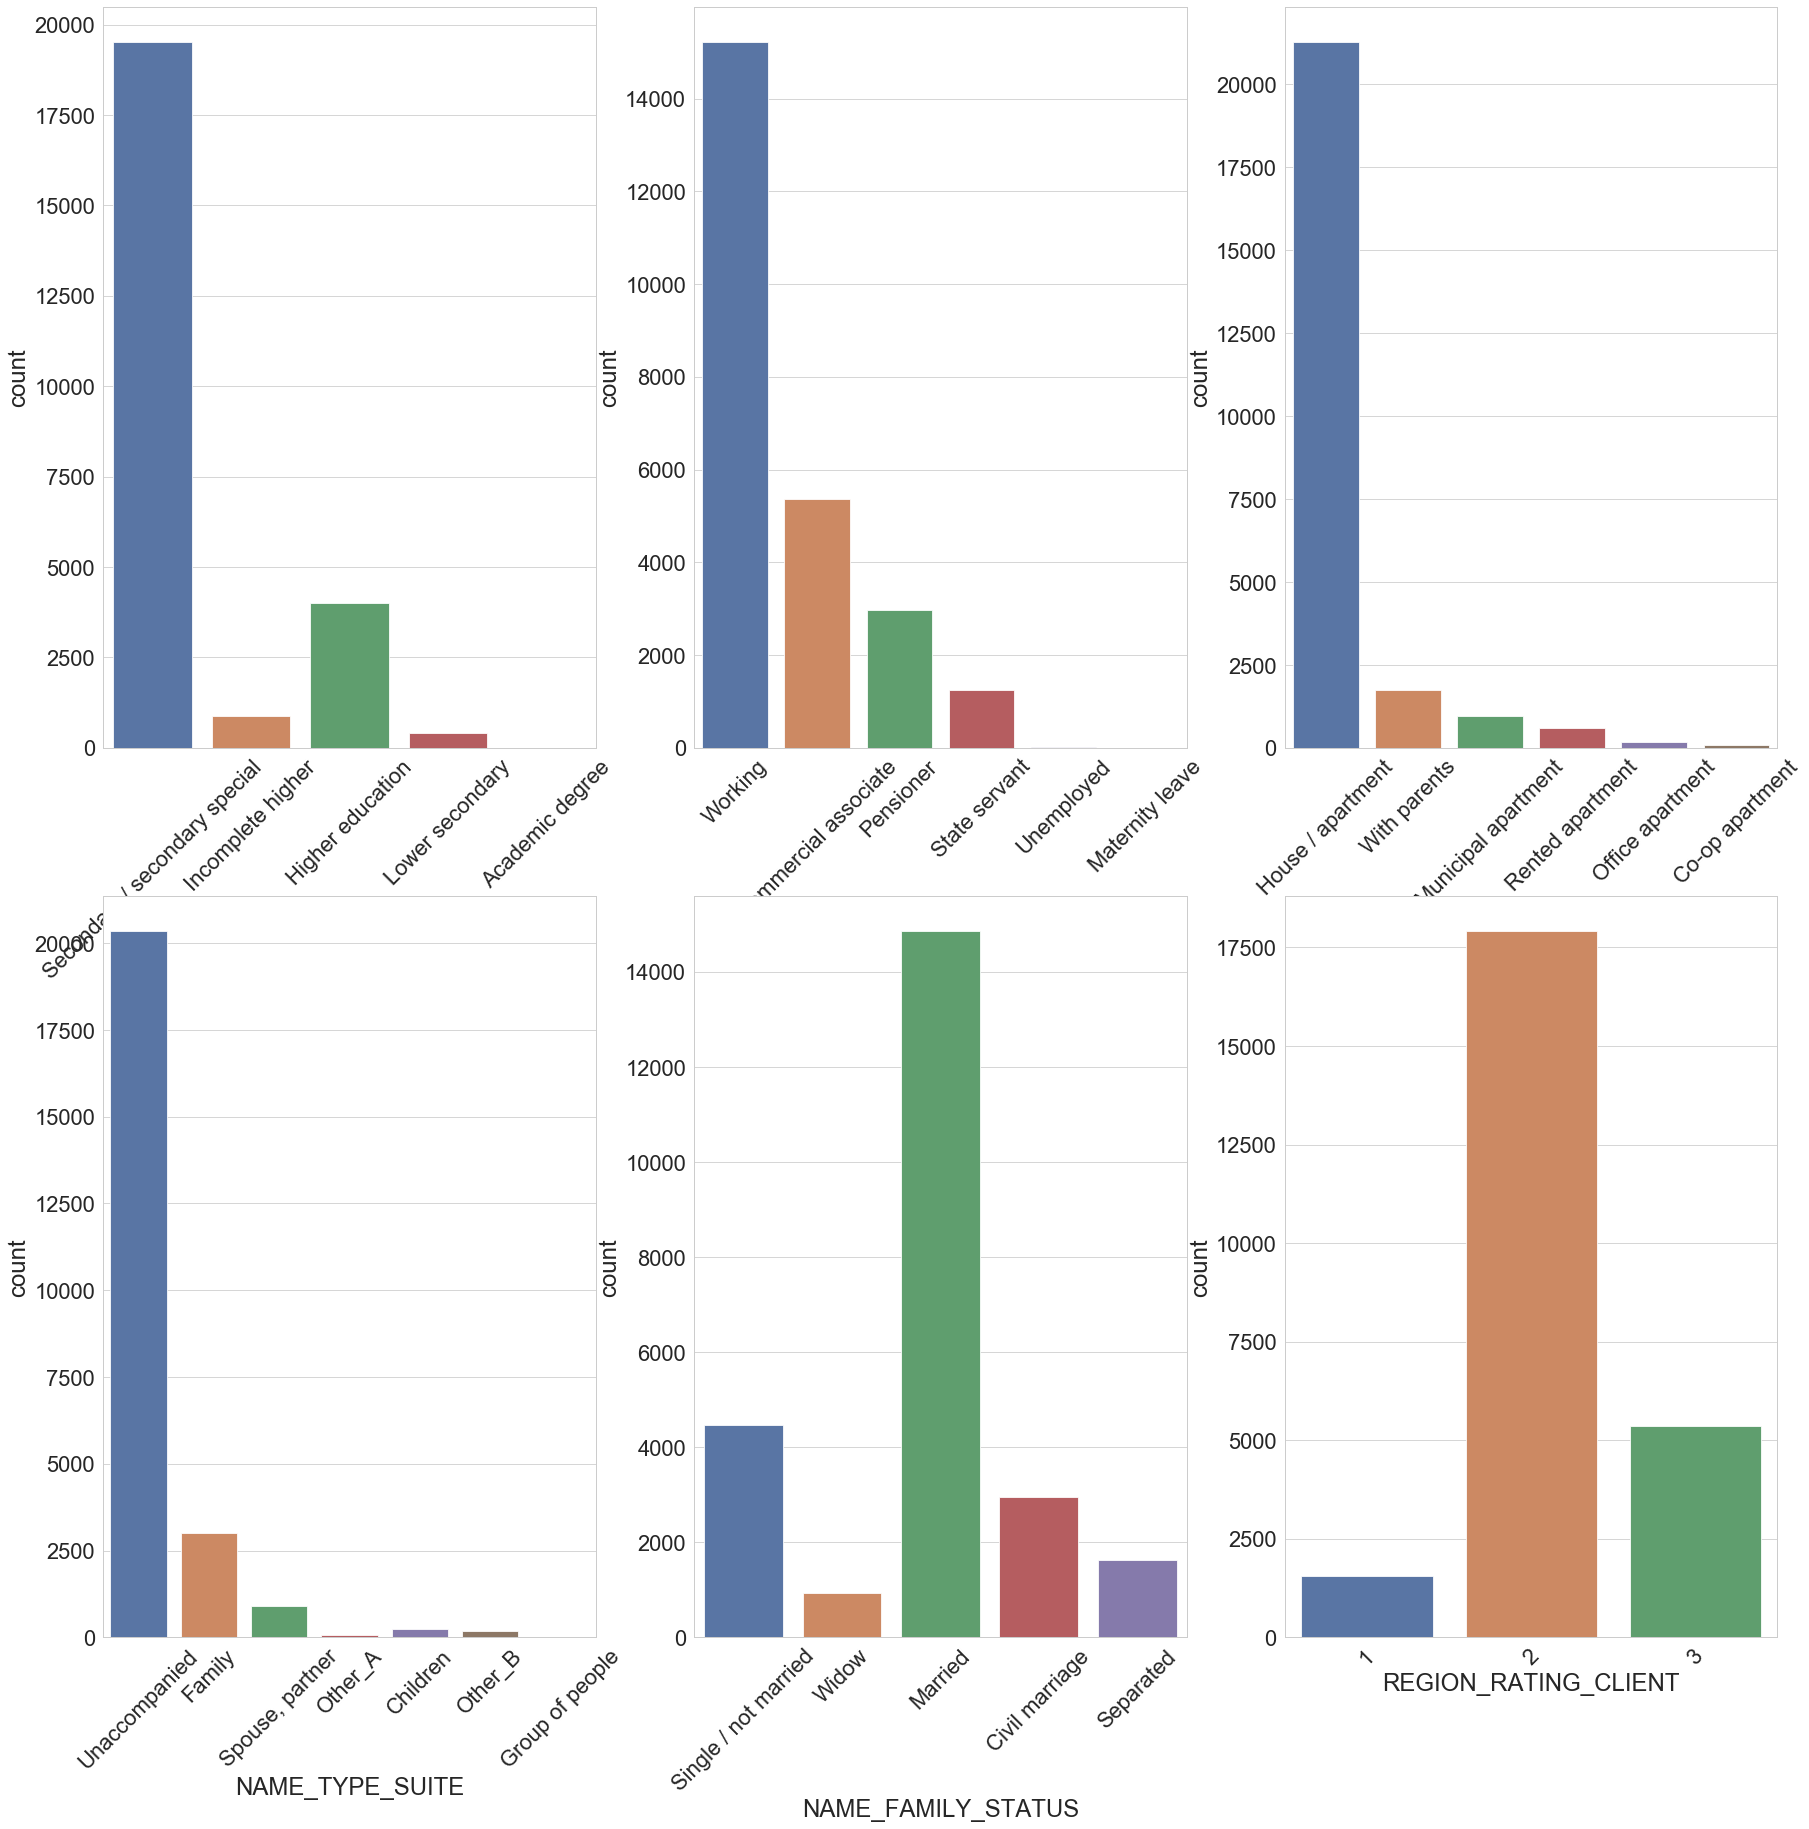

In [25]:
# Univariate Categorical on df_1
sns.set(style='whitegrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=2.5)                                                                                                                                                                                                                                                                                
color = sns.color_palette("Set2", 9)
plt.figure(figsize = (30,30))
plt.subplot(2,3,1)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = df_1)

plt.subplot(2,3,2)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_INCOME_TYPE', data = df_1)

plt.subplot(2,3,3)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = df_1)

plt.subplot(2,3,4)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_TYPE_SUITE', data = df_1)

plt.subplot(2,3,5)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = df_1)

plt.subplot(2,3,6)
plt.xticks(rotation=45)
sns.countplot(x = 'REGION_RATING_CLIENT', data = df_1)

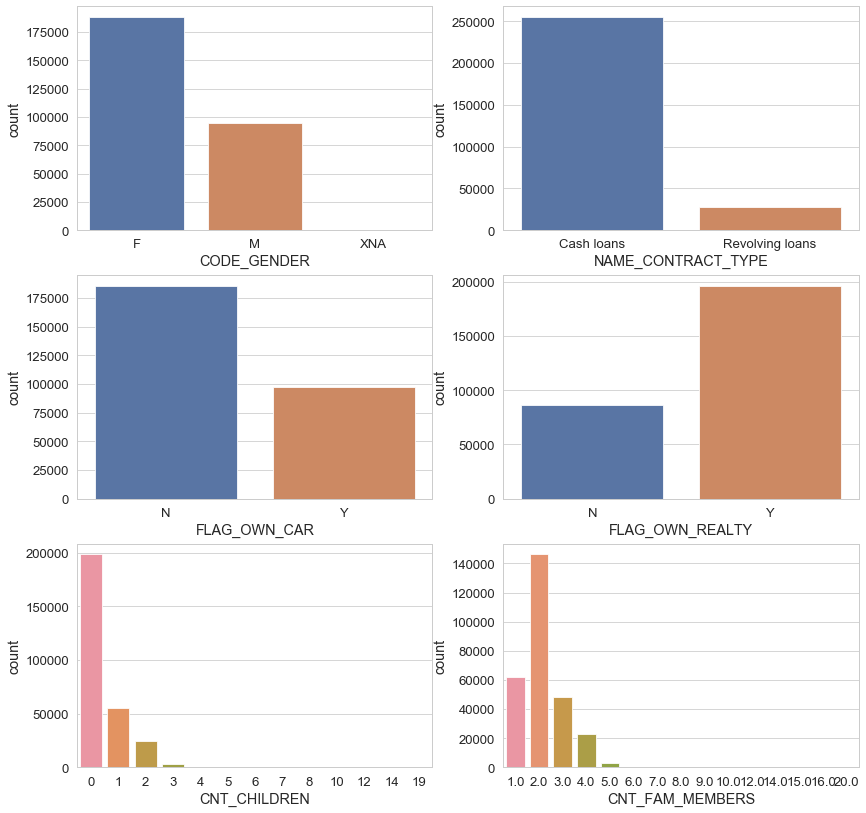

In [32]:
# Univariate Categorical on df_0
sns.set(style='whitegrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=1.5)                                                                                                                                                                                                                                                                                
color = sns.color_palette("Set1", 6)
plt.figure(figsize = (14,14))

plt.subplot(3,2,1)
sns.countplot(x = 'CODE_GENDER', data = df_0)

plt.subplot(3,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df_0)

plt.subplot(3,2,3)
sns.countplot(x = 'FLAG_OWN_CAR', data = df_0)

plt.subplot(3,2,4)
sns.countplot(x = 'FLAG_OWN_REALTY', data = df_0)

plt.subplot(3,2,5)
sns.countplot(x = 'CNT_CHILDREN', data = df_0)

plt.subplot(3,2,6)
sns.countplot(x = 'CNT_FAM_MEMBERS', data = df_0)

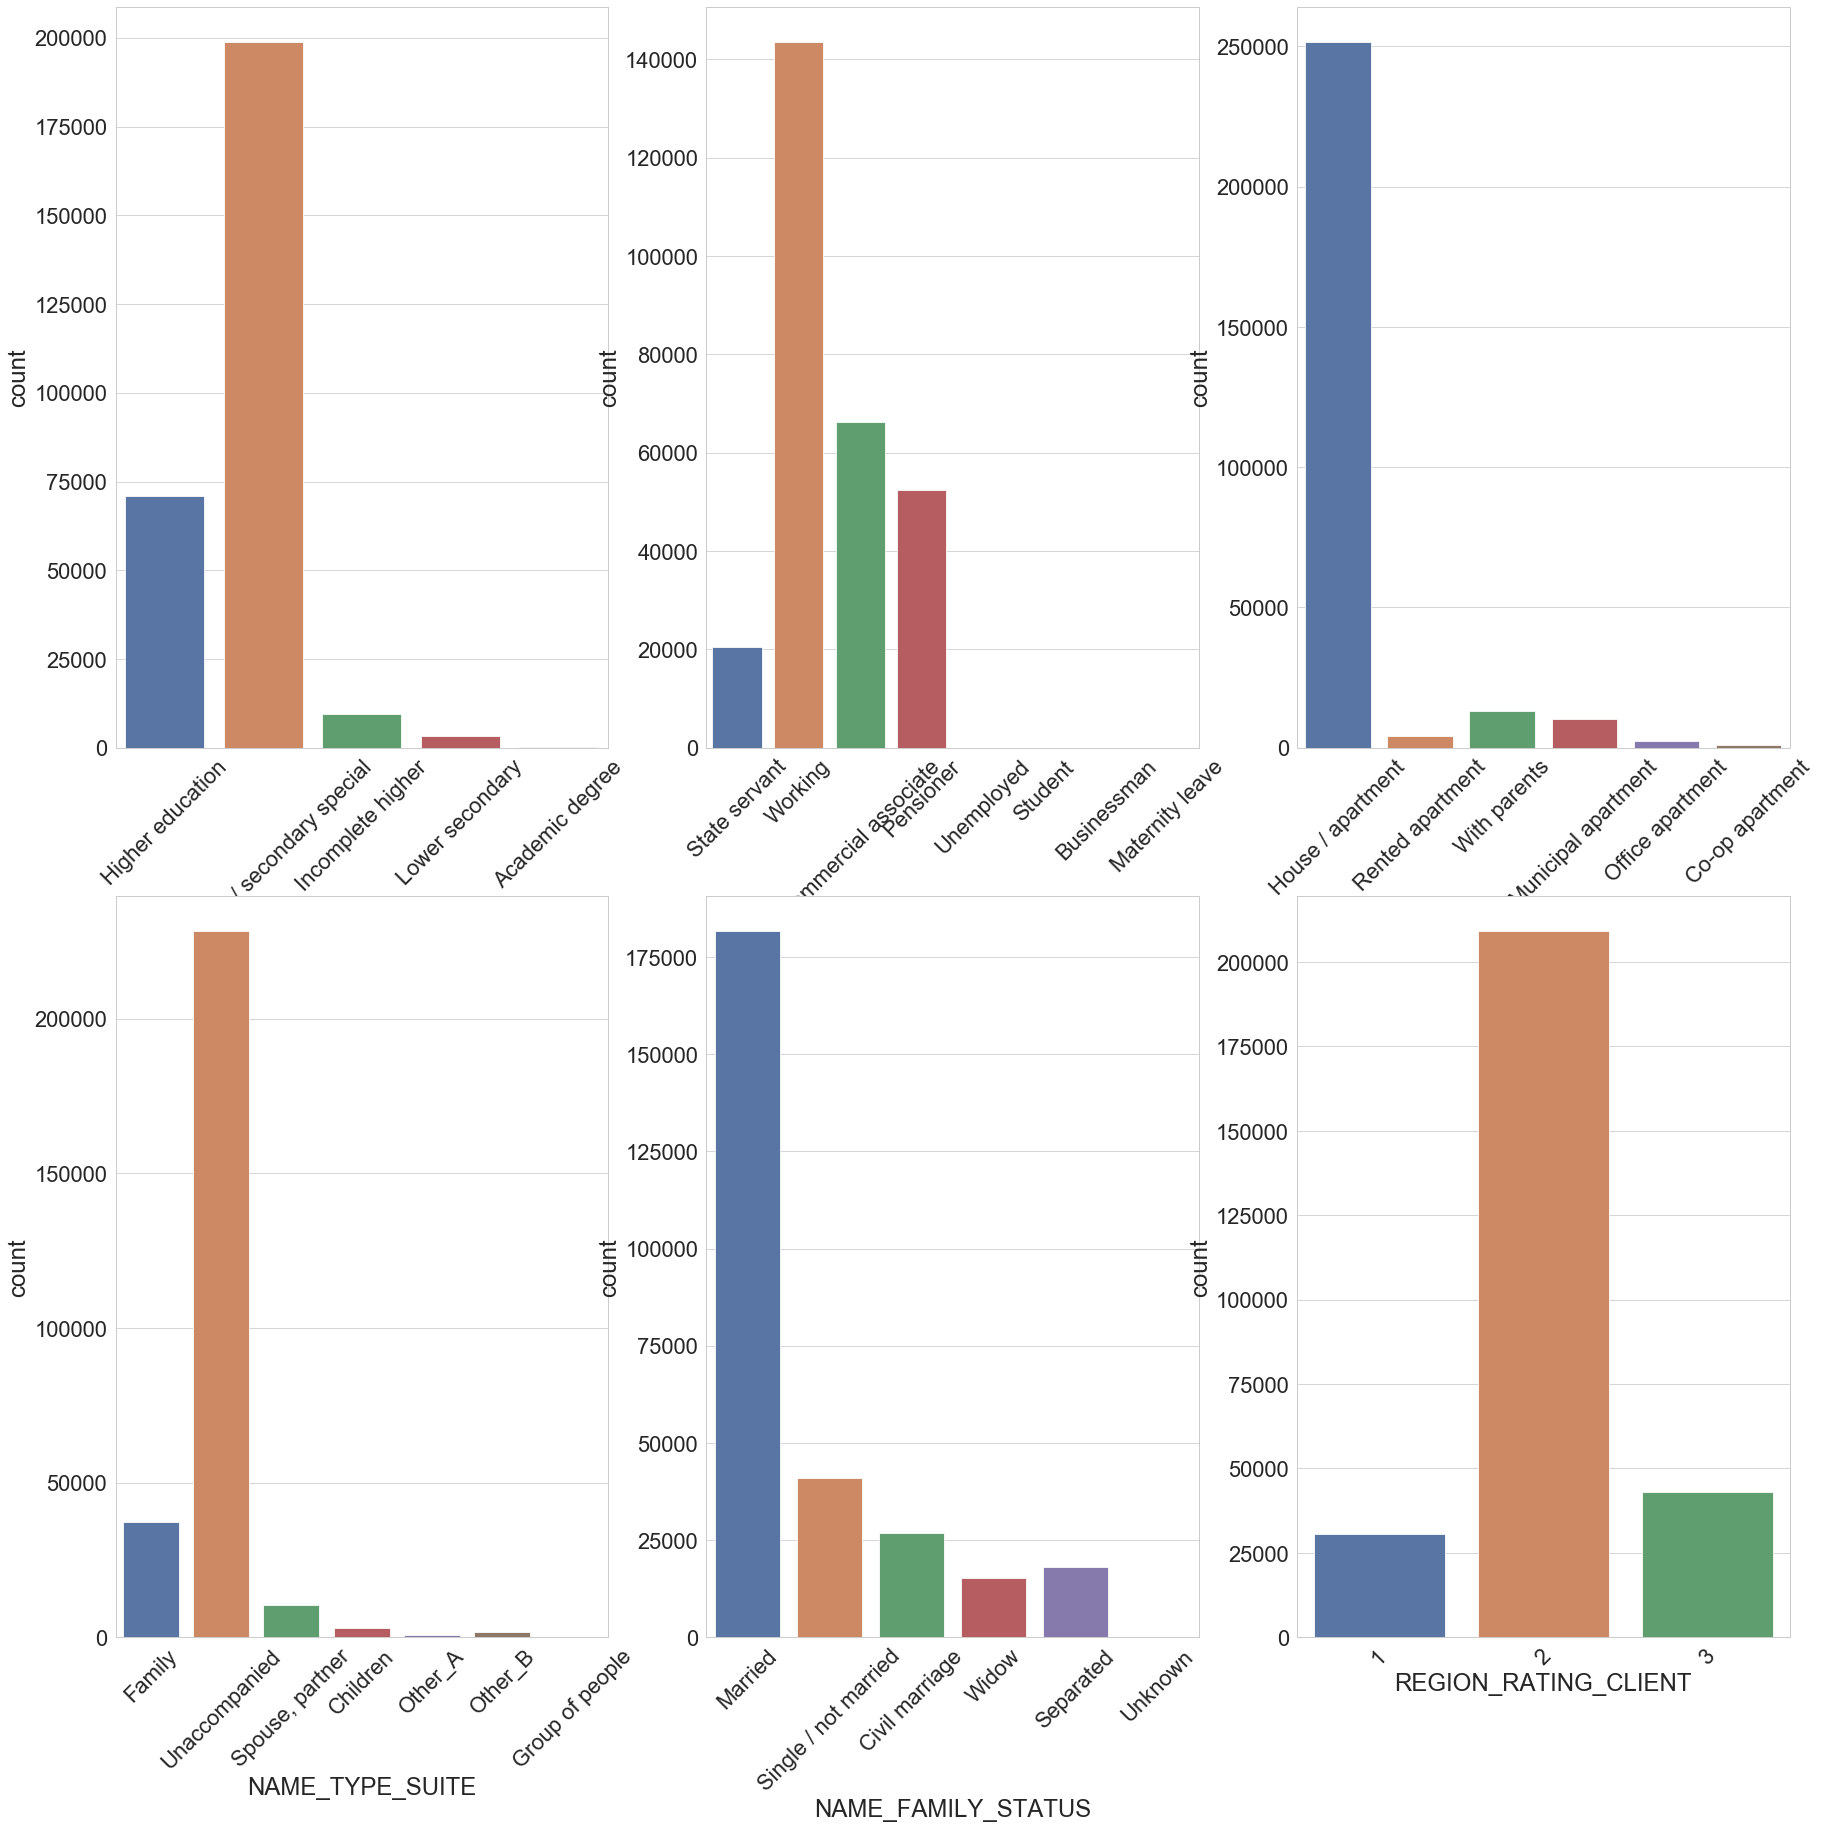

In [33]:
# Univariate Categorical on df_0
sns.set(style='whitegrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=2.5)                                                                                                                                                                                                                                                                                
color = sns.color_palette("Set2", 9)
plt.figure(figsize = (30,30))
plt.subplot(2,3,1)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = df_0)

plt.subplot(2,3,2)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_INCOME_TYPE', data = df_0)

plt.subplot(2,3,3)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_HOUSING_TYPE', data = df_0)

plt.subplot(2,3,4)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_TYPE_SUITE', data = df_0)

plt.subplot(2,3,5)
plt.xticks(rotation=45)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = df_0)

plt.subplot(2,3,6)
plt.xticks(rotation=45)
sns.countplot(x = 'REGION_RATING_CLIENT', data = df_0)

In [65]:
#univariate continous variables plots:
sns.set(style='darkgrid', rc={"grid.linewidth": 50})
sns.set_context("paper", font_scale=12)                                                  
plt.figure(figsize=(200, 200))                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 9)
plt.subplot(4,4,1)
plt.title('CNT_CHILDREN')
sns.distplot(df_1['CNT_CHILDREN'],rug=True)
plt.subplot(4,4,2)
plt.title('AMT_INCOME_TOTAL')
sns.distplot(df_1['AMT_INCOME_TOTAL'],rug=True)
plt.subplot(4,4,3)
plt.title('AMT_CREDIT')
sns.distplot(df_1['AMT_CREDIT'],rug=True)
plt.subplot(4,4,4)
plt.title('AMT_ANNUITY')
sns.distplot(df_1['AMT_ANNUITY'],rug=True)
plt.subplot(4,4,5)
plt.title('AMT_GOODS_PRICE')
df_1['AMT_GOODS_PRICE'].hist()
plt.subplot(4,4,6)
plt.title('REGION_POPULATION_RELATIVE')
sns.distplot(df_1['REGION_POPULATION_RELATIVE'],rug=True)
plt.subplot(4,4,7)
plt.title('DAYS_EMPLOYED')
sns.distplot(df_1['DAYS_EMPLOYED'],rug=True)
plt.subplot(4,4,8)
plt.title('CNT_FAM_MEMBERS')
sns.distplot(df_1['CNT_FAM_MEMBERS'],rug=True)
plt.subplot(4,4,9)
plt.title('REGION_RATING_CLIENT')
sns.distplot(df_1['REGION_RATING_CLIENT'],rug=True)             
plt.subplot(4,4,10)
plt.title('EXT_SOURCE_2')
df_1['EXT_SOURCE_2'].hist()
plt.subplot(4,4,11)
plt.title('EXT_SOURCE_3')
df_1['EXT_SOURCE_3'].hist()
plt.subplot(4,4,12)
plt.title('OBS_30_CNT_SOCIAL_CIRCLE')
df_1['OBS_30_CNT_SOCIAL_CIRCLE'].hist()
plt.subplot(4,4,13)
plt.title('DEF_30_CNT_SOCIAL_CIRCLE')
df_1['DEF_30_CNT_SOCIAL_CIRCLE'].hist()
plt.subplot(4,4,14)
plt.title('OBS_60_CNT_SOCIAL_CIRCLE')
df_1['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.subplot(4,4,15)
plt.title('DEF_60_CNT_SOCIAL_CIRCLE')
df_1['DEF_60_CNT_SOCIAL_CIRCLE'].hist()
plt.subplot(4,4,16)
plt.title('DAYS_LAST_PHONE_CHANGE')
sns.distplot(df_1['DAYS_LAST_PHONE_CHANGE'],rug=True)

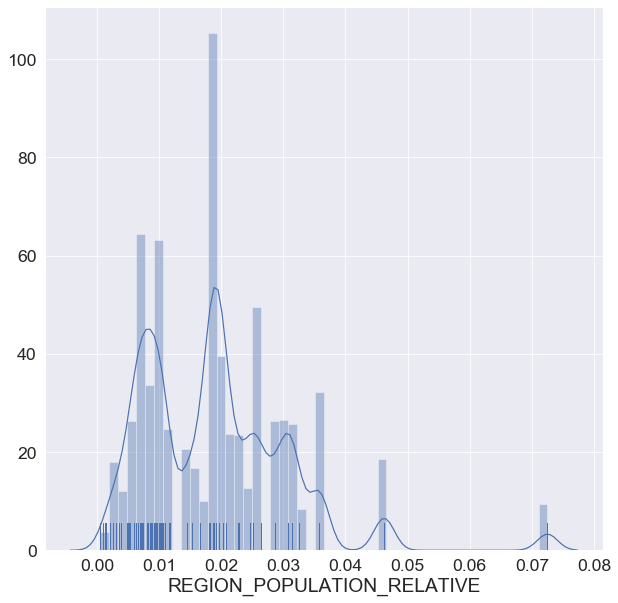

In [133]:
sns.set(style='darkgrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=2)                                                  
plt.figure(figsize=(10, 10)) 
color = sns.color_palette("Set2", 9)
sns.distplot(df_1['REGION_POPULATION_RELATIVE'],rug=True)

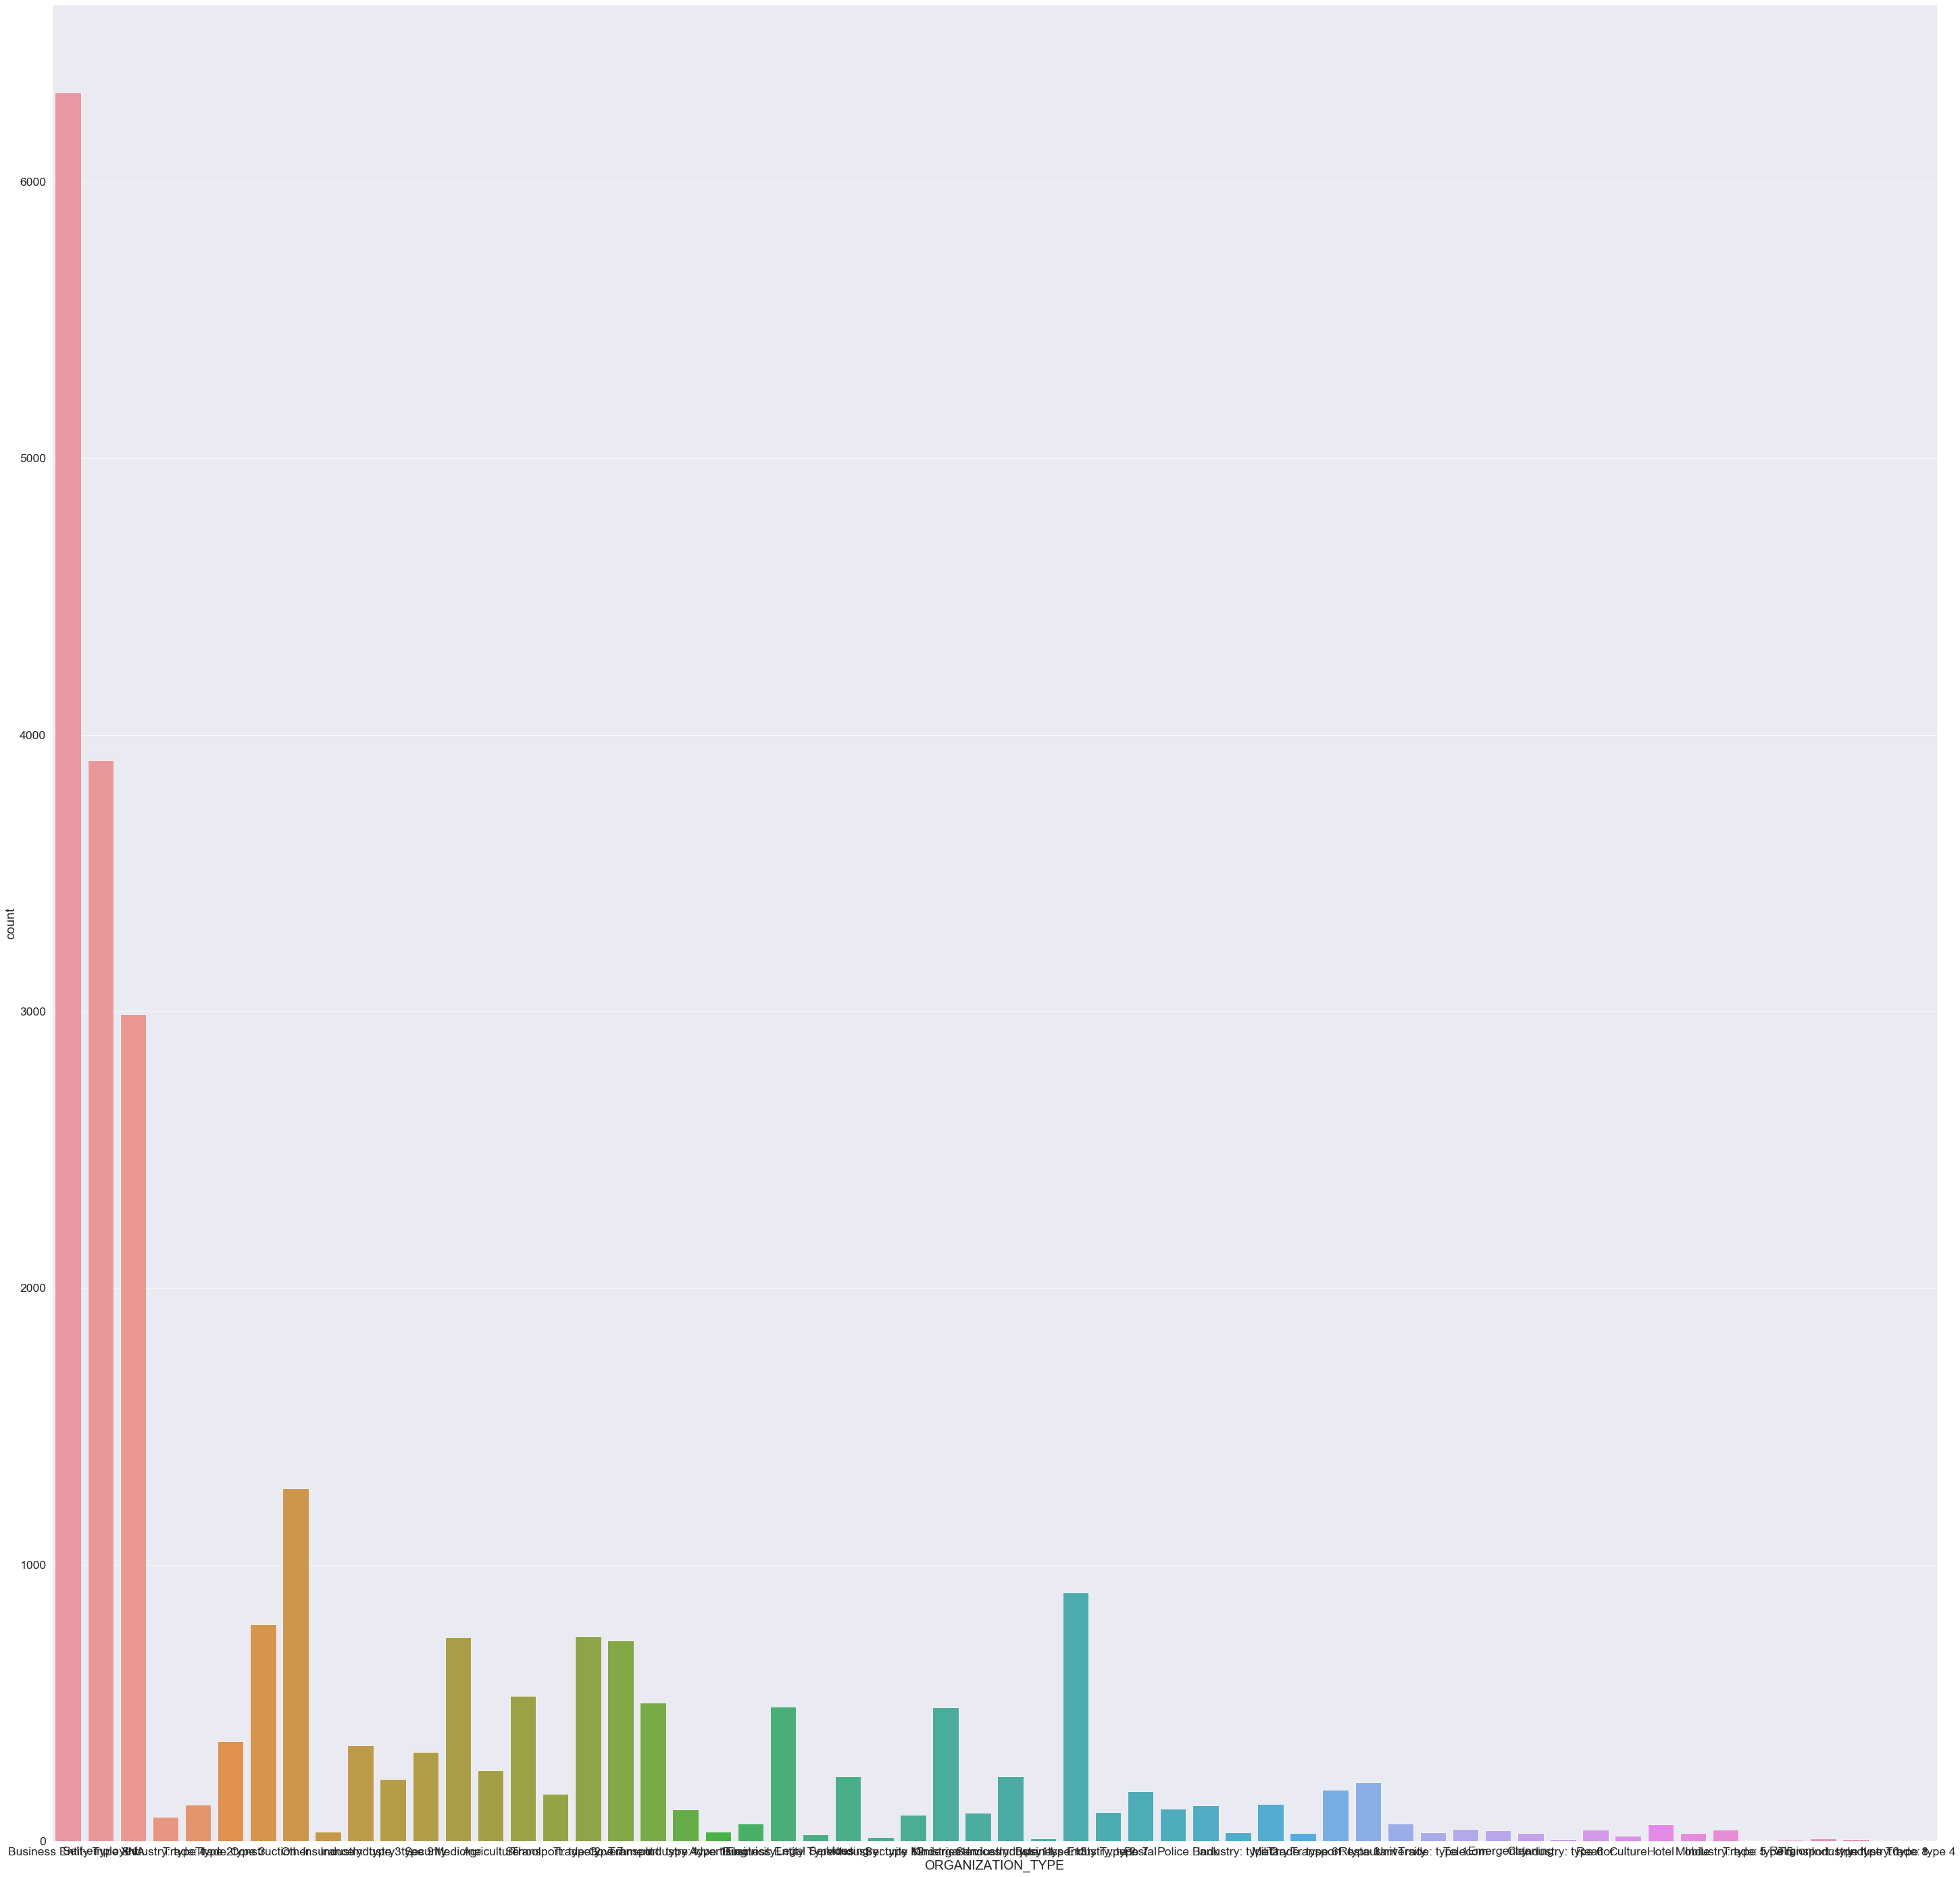

In [136]:
sns.set(style='darkgrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=2)                                                  
plt.figure(figsize=(50, 50)) 
color = sns.color_palette("Set2", 9)
sns.countplot(x='ORGANIZATION_TYPE',data=df_1)

In [34]:
#correlation bivariate analysis for df_1
num_df1 = df_1[['OBS_60_CNT_SOCIAL_CIRCLE','HOUR_APPR_PROCESS_START',
               'OBS_30_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_GOODS_PRICE',
               'EXT_SOURCE_3','AMT_CREDIT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','AMT_ANNUITY','DAYS_REGISTRATION',
               'DAYS_BIRTH','EXT_SOURCE_2']]

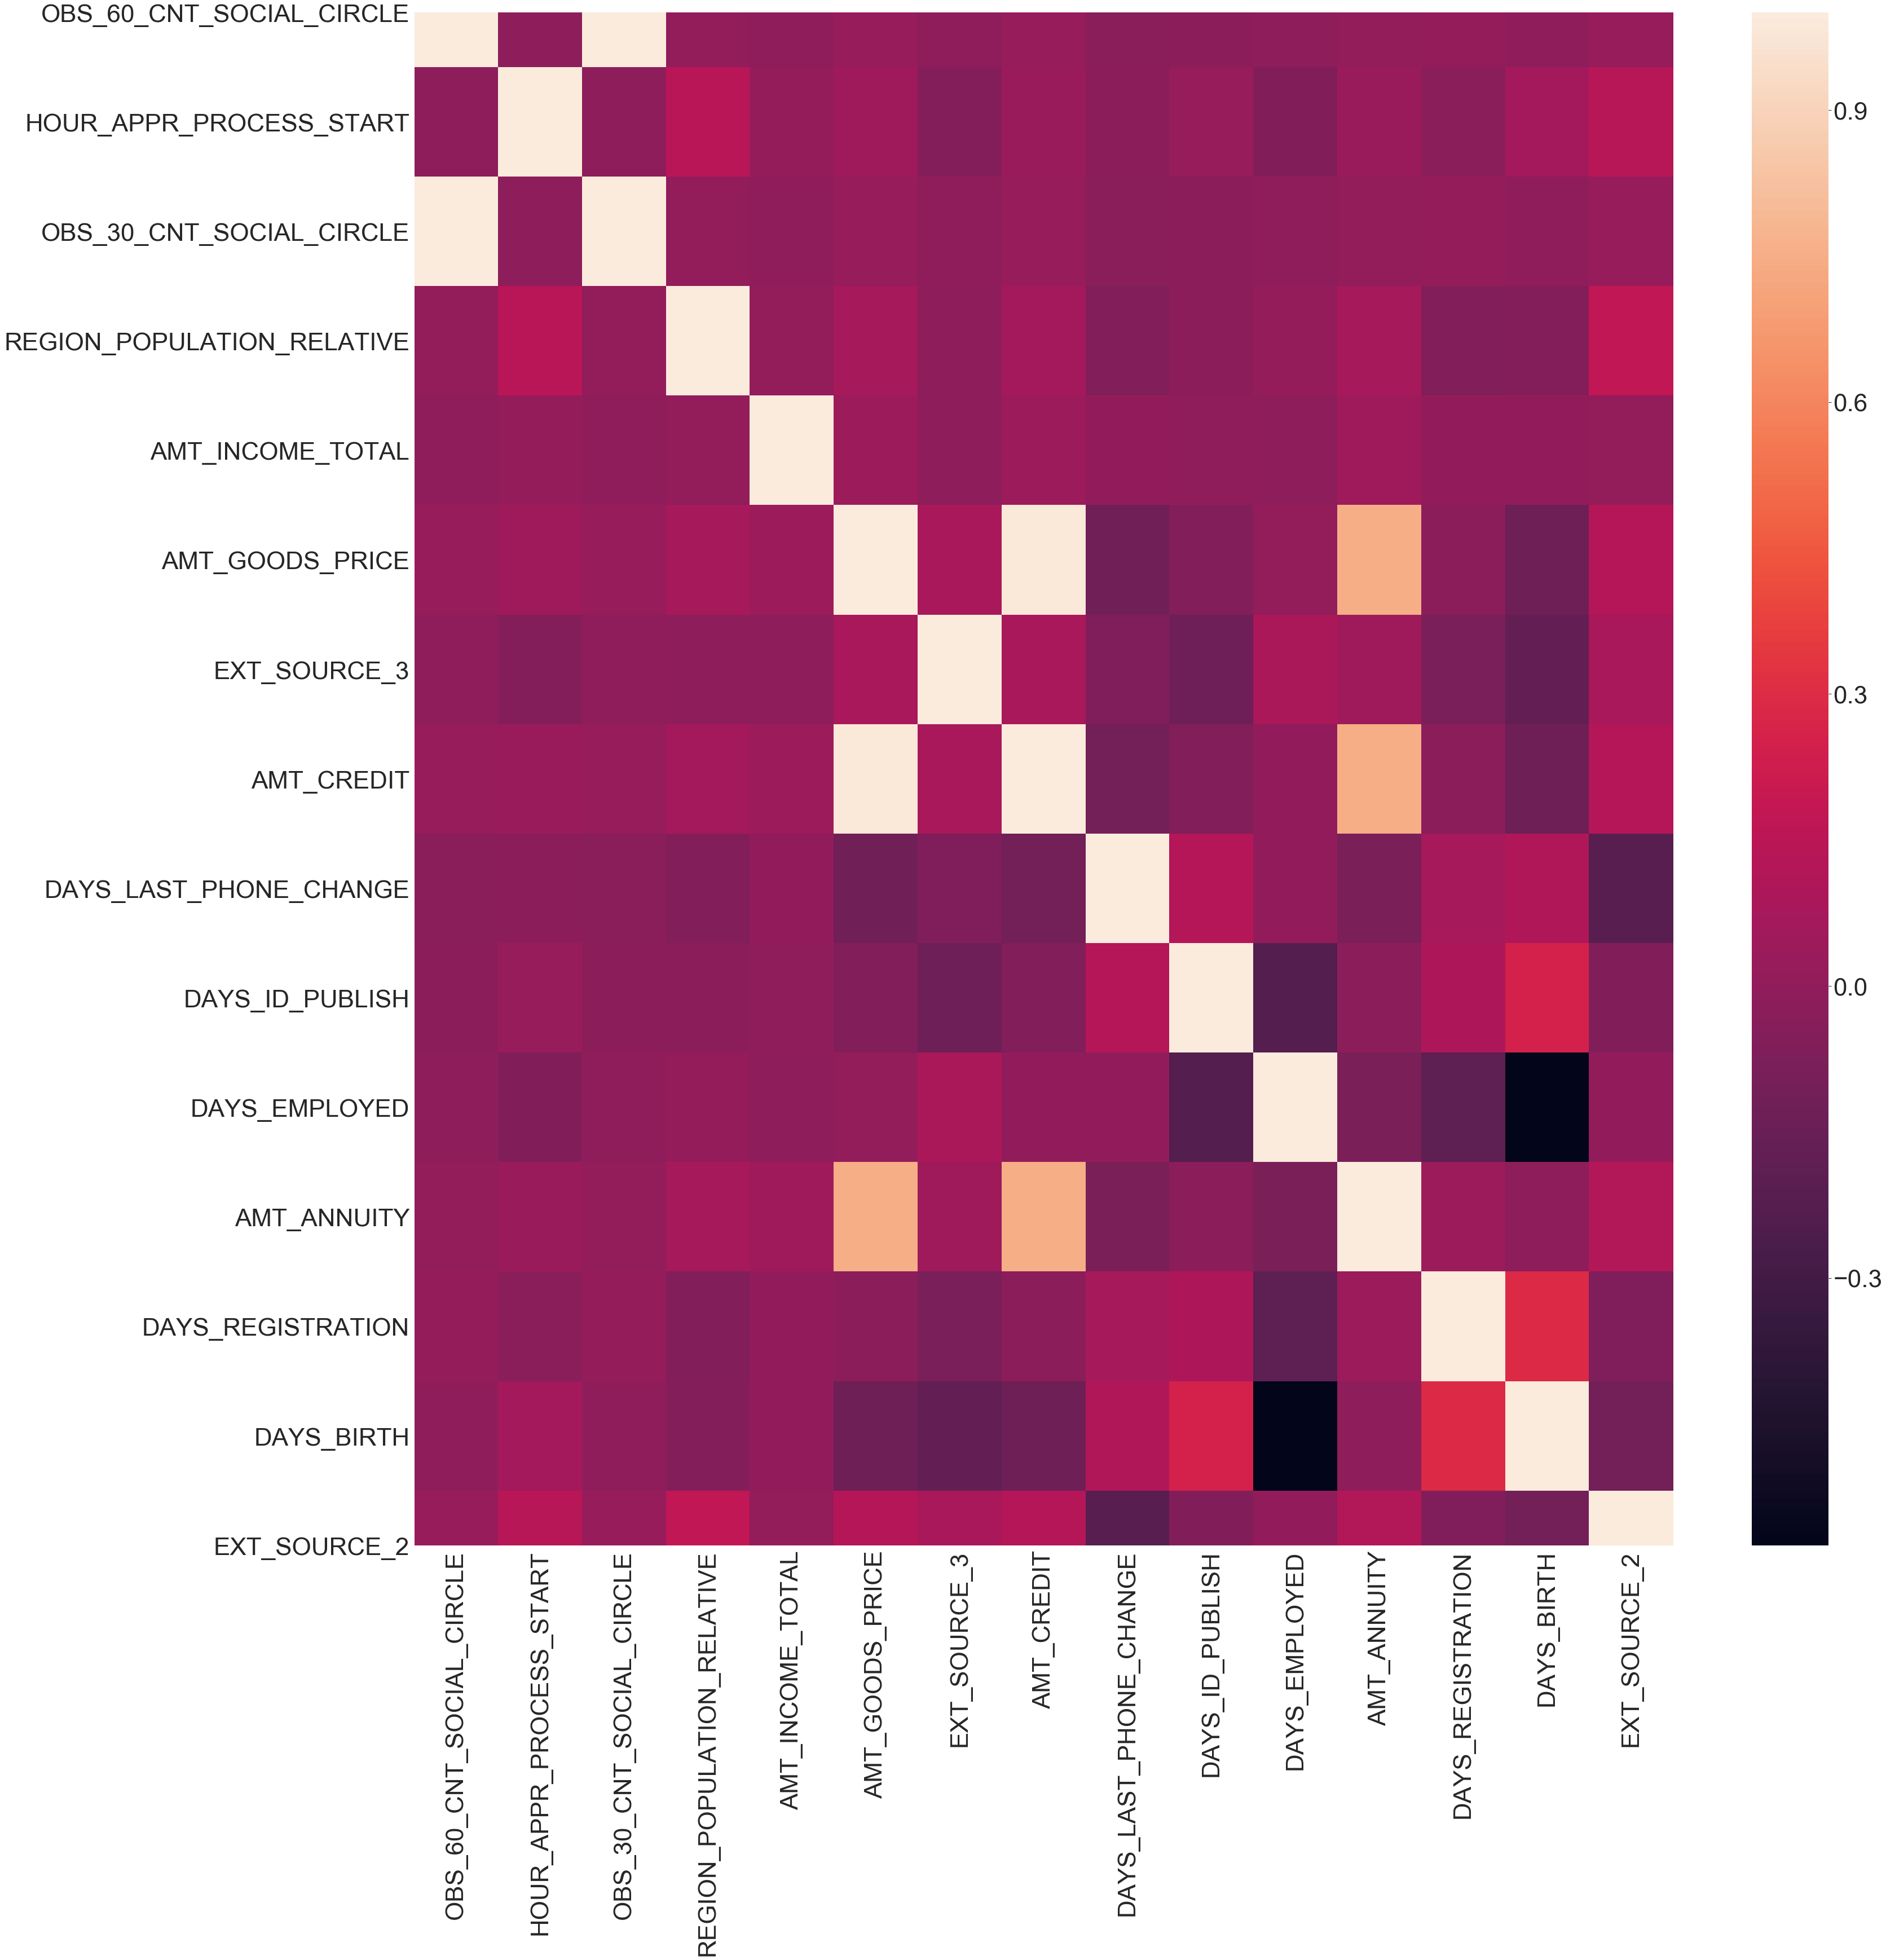

In [35]:
#correlation bivariate analysis for df_1
sns.set(style='darkgrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=5)                                                  
plt.figure(figsize=(50, 50)) 
color = sns.color_palette("Set2", 9)
corr_matrix1 = num_df1.corr()
sns.heatmap(corr_matrix1, annot =False)

In [45]:
#correlation bivariate analysis for df_0
num_df0 = df_0[['OBS_60_CNT_SOCIAL_CIRCLE','HOUR_APPR_PROCESS_START',
               'OBS_30_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_GOODS_PRICE',
               'EXT_SOURCE_3','AMT_CREDIT','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_EMPLOYED','AMT_ANNUITY','DAYS_REGISTRATION',
               'DAYS_BIRTH','EXT_SOURCE_2']]

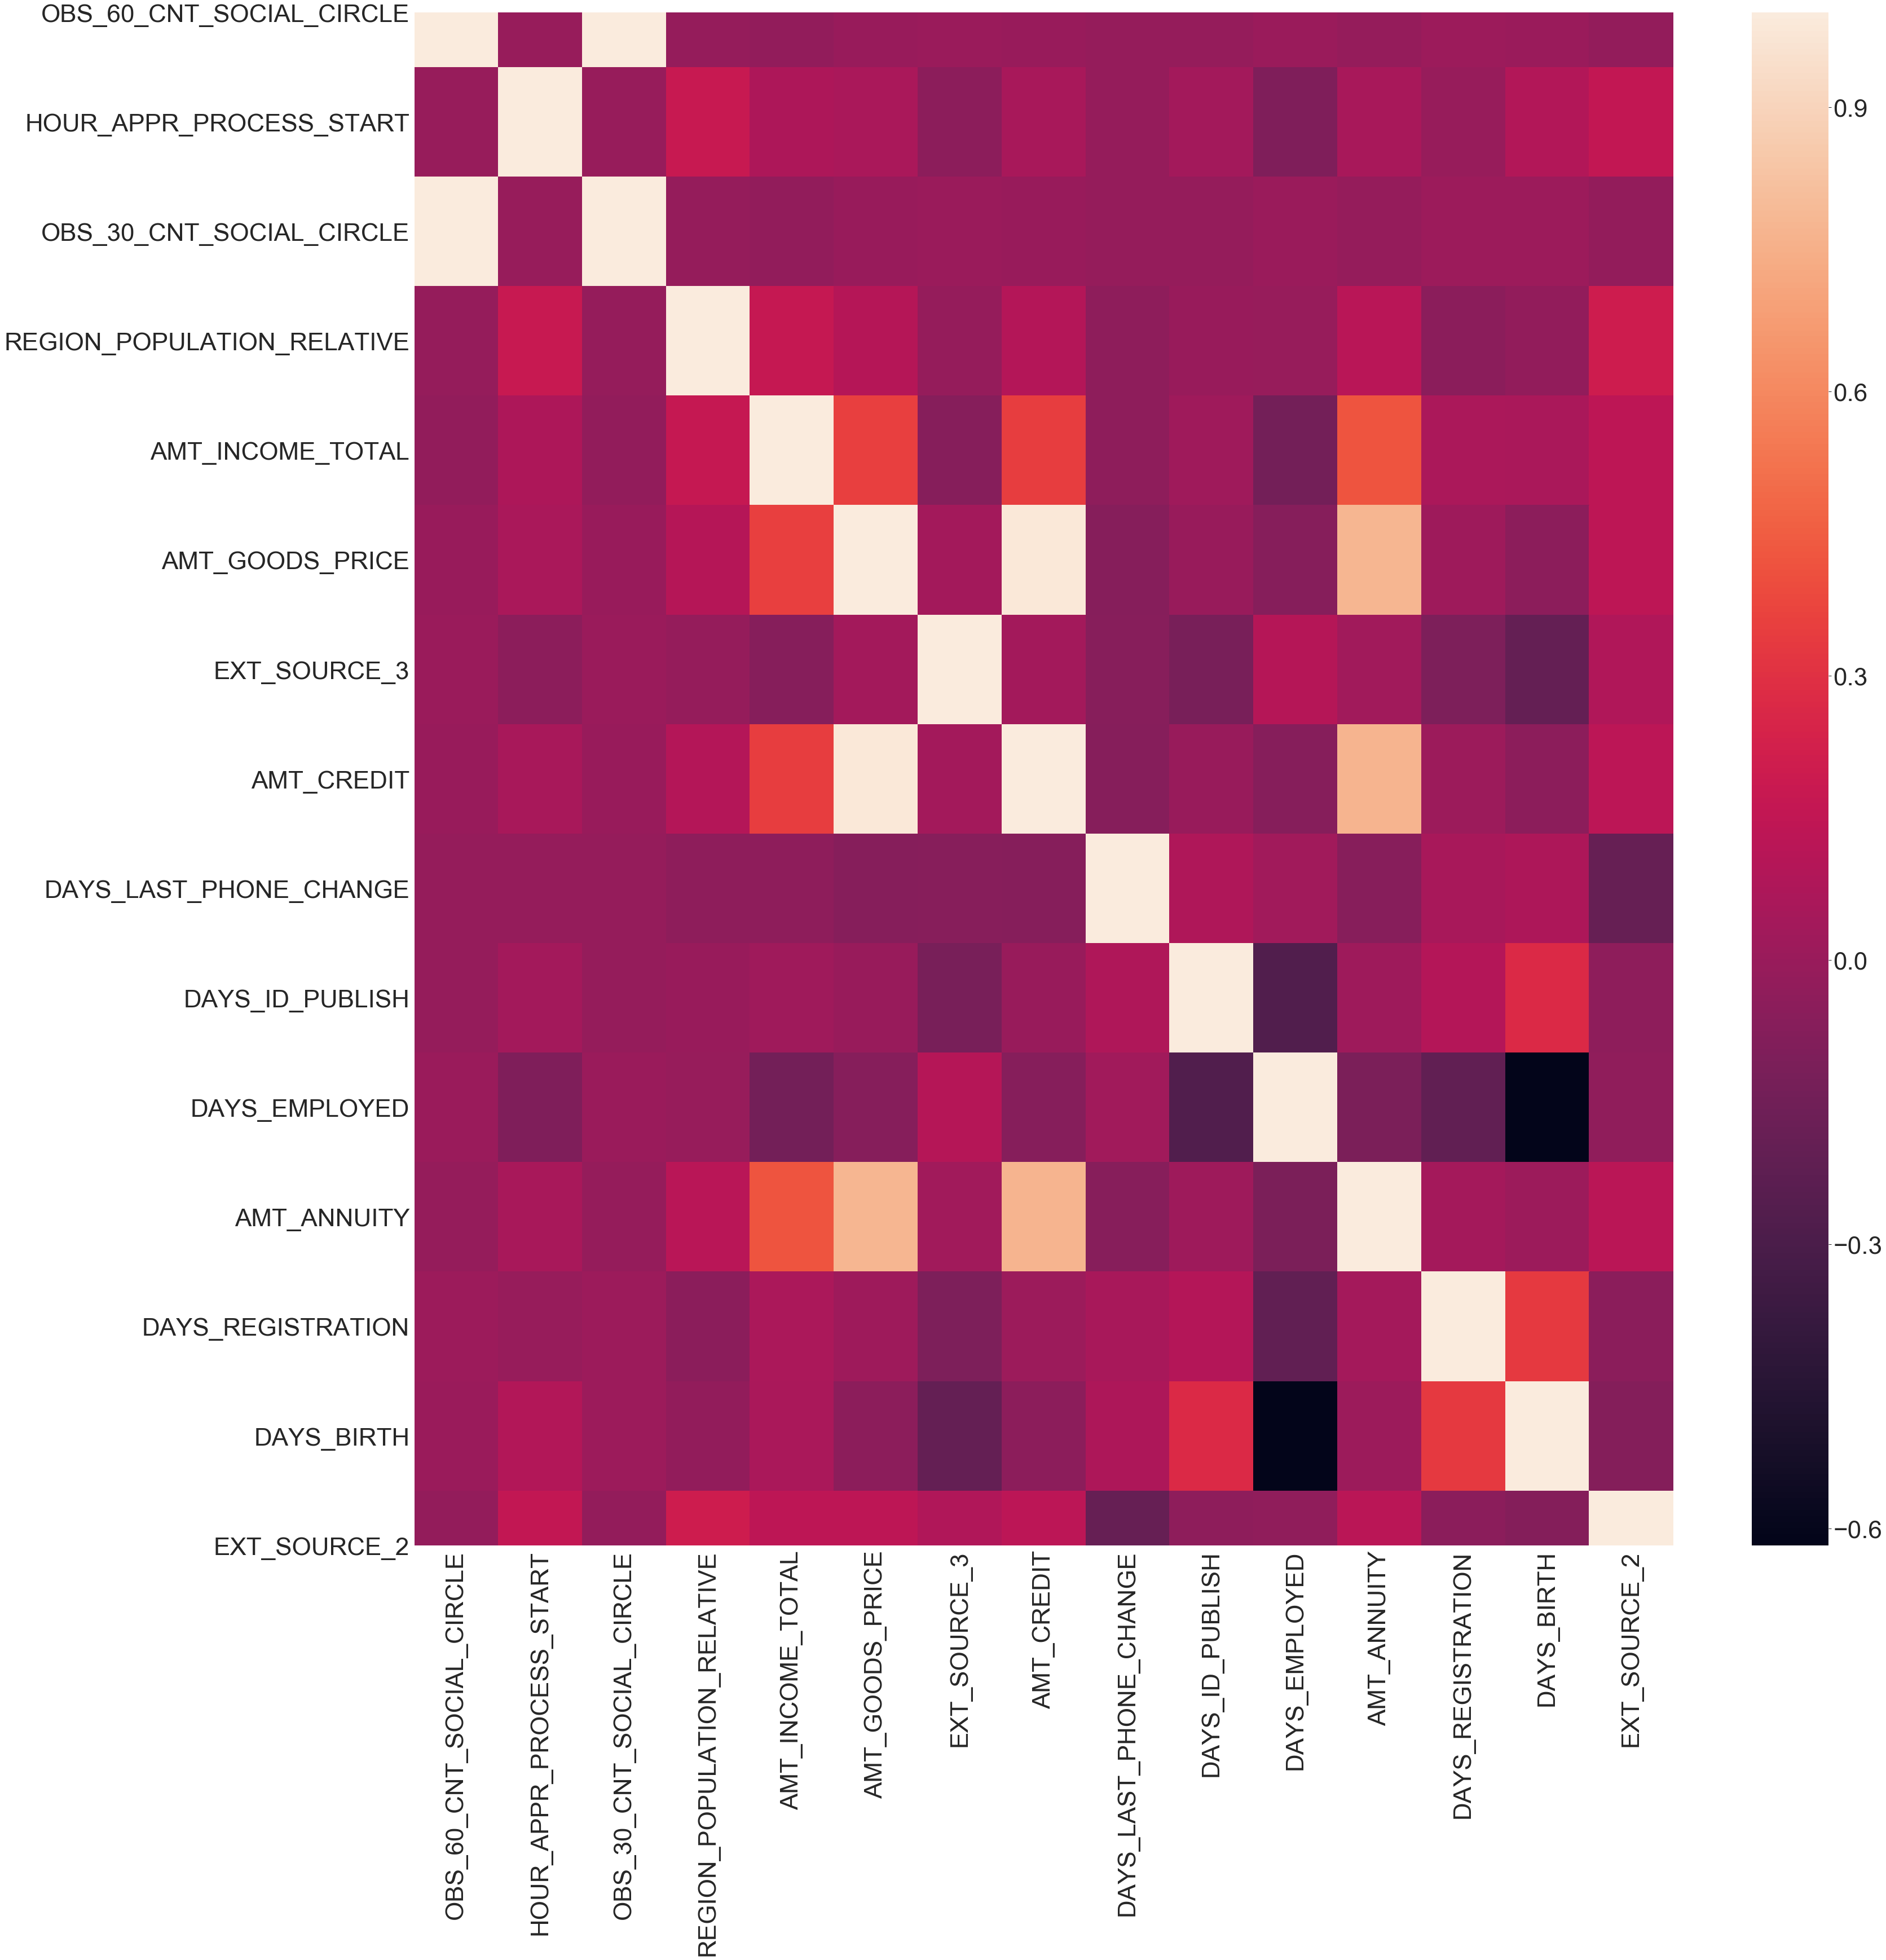

In [46]:
#correlation bivariate analysis for df_0
sns.set(style='darkgrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=5)                                                  
plt.figure(figsize=(50, 50)) 
color = sns.color_palette("Set2", 9)
corr_matrix0 = num_df0.corr()
sns.heatmap(corr_matrix0, annot =False)

In [37]:
corrdf1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))

In [38]:
corrdf1 = corrdf1.unstack().reset_index()

In [39]:
corrdf1.columns = ['Var1', 'Var2', 'Correlation']
corrdf1

Var1                        Var2  Correlation
0      OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE          NaN
1      OBS_60_CNT_SOCIAL_CIRCLE     HOUR_APPR_PROCESS_START          NaN
2      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE          NaN
3      OBS_60_CNT_SOCIAL_CIRCLE  REGION_POPULATION_RELATIVE          NaN
4      OBS_60_CNT_SOCIAL_CIRCLE            AMT_INCOME_TOTAL          NaN
5      OBS_60_CNT_SOCIAL_CIRCLE             AMT_GOODS_PRICE          NaN
6      OBS_60_CNT_SOCIAL_CIRCLE                EXT_SOURCE_3          NaN
7      OBS_60_CNT_SOCIAL_CIRCLE                  AMT_CREDIT          NaN
8      OBS_60_CNT_SOCIAL_CIRCLE      DAYS_LAST_PHONE_CHANGE          NaN
9      OBS_60_CNT_SOCIAL_CIRCLE             DAYS_ID_PUBLISH          NaN
10     OBS_60_CNT_SOCIAL_CIRCLE               DAYS_EMPLOYED          NaN
11     OBS_60_CNT_SOCIAL_CIRCLE                 AMT_ANNUITY          NaN
12     OBS_60_CNT_SOCIAL_CIRCLE           DAYS_REGISTRATION          NaN
13     OBS_60_CNT_SOCIAL_CIRCLE                  DAYS_BIRTH          NaN
14     OBS_60_CNT_SOCIAL_CIRCLE                EXT_SOURCE_2          NaN
15      HOUR_APPR_PROCESS_START    OBS_60_CNT_SOCIAL_CIRCLE    -0.012287
16      HOUR_APPR_PROCESS_START     HOUR_APPR_PROCESS_START          NaN
17      HOUR_APPR_PROCESS_START    OBS_30_CNT_SOCIAL_CIRCLE          NaN
18      HOUR_APPR_PROCESS_START  REGION_POPULATION_RELATIVE          NaN
19      HOUR_APPR_PROCESS_START            AMT_INCOME_TOTAL          NaN
20      HOUR_APPR_PROCESS_START             AMT_GOODS_PRICE          NaN
21      HOUR_APPR_PROCESS_START                EXT_SOURCE_3          NaN
22      HOUR_APPR_PROCESS_START                  AMT_CREDIT          NaN
23      HOUR_APPR_PROCESS_START      DAYS_LAST_PHONE_CHANGE          NaN
24      HOUR_APPR_PROCESS_START             DAYS_ID_PUBLISH          NaN
25      HOUR_APPR_PROCESS_START               DAYS_EMPLOYED          NaN
26      HOUR_APPR_PROCESS_START                 AMT_ANNUITY          NaN
27      HOUR_APPR_PROCESS_START           DAYS_REGISTRATION          NaN
28      HOUR_APPR_PROCESS_START                  DAYS_BIRTH          NaN
29      HOUR_APPR_PROCESS_START                EXT_SOURCE_2          NaN
30     OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.998269
31     OBS_30_CNT_SOCIAL_CIRCLE     HOUR_APPR_PROCESS_START    -0.012776
32     OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE          NaN
33     OBS_30_CNT_SOCIAL_CIRCLE  REGION_POPULATION_RELATIVE          NaN
34     OBS_30_CNT_SOCIAL_CIRCLE            AMT_INCOME_TOTAL          NaN
35     OBS_30_CNT_SOCIAL_CIRCLE             AMT_GOODS_PRICE          NaN
36     OBS_30_CNT_SOCIAL_CIRCLE                EXT_SOURCE_3          NaN
37     OBS_30_CNT_SOCIAL_CIRCLE                  AMT_CREDIT          NaN
38     OBS_30_CNT_SOCIAL_CIRCLE      DAYS_LAST_PHONE_CHANGE          NaN
39     OBS_30_CNT_SOCIAL_CIRCLE             DAYS_ID_PUBLISH          NaN
40     OBS_30_CNT_SOCIAL_CIRCLE               DAYS_EMPLOYED          NaN
41     OBS_30_CNT_SOCIAL_CIRCLE                 AMT_ANNUITY          NaN
42     OBS_30_CNT_SOCIAL_CIRCLE           DAYS_REGISTRATION          NaN
43     OBS_30_CNT_SOCIAL_CIRCLE                  DAYS_BIRTH          NaN
44     OBS_30_CNT_SOCIAL_CIRCLE                EXT_SOURCE_2          NaN
45   REGION_POPULATION_RELATIVE    OBS_60_CNT_SOCIAL_CIRCLE     0.006793
46   REGION_POPULATION_RELATIVE     HOUR_APPR_PROCESS_START     0.142744
47   REGION_POPULATION_RELATIVE    OBS_30_CNT_SOCIAL_CIRCLE     0.006224
48   REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE          NaN
49   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL          NaN
50   REGION_POPULATION_RELATIVE             AMT_GOODS_PRICE          NaN
51   REGION_POPULATION_RELATIVE                EXT_SOURCE_3          NaN
52   REGION_POPULATION_RELATIVE                  AMT_CREDIT          NaN
53   REGION_POPULATION_RELATIVE      DAYS_LAST_PHONE_CHANGE          NaN
54   REGION_

In [40]:
corrdf1.dropna(subset = ['Correlation'], inplace = True)

In [41]:
corrdf1.Correlation = abs(corrdf1.Correlation)
corrdf1.sort_values('Correlation', ascending = False)

Var1                        Var2  Correlation
30     OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.998269
110                  AMT_CREDIT             AMT_GOODS_PRICE     0.983103
170                 AMT_ANNUITY             AMT_GOODS_PRICE     0.752699
172                 AMT_ANNUITY                  AMT_CREDIT     0.752195
205                  DAYS_BIRTH               DAYS_EMPLOYED     0.575097
207                  DAYS_BIRTH           DAYS_REGISTRATION     0.289114
204                  DAYS_BIRTH             DAYS_ID_PUBLISH     0.252863
159               DAYS_EMPLOYED             DAYS_ID_PUBLISH     0.226470
218                EXT_SOURCE_2      DAYS_LAST_PHONE_CHANGE     0.207900
190           DAYS_REGISTRATION               DAYS_EMPLOYED     0.188929
201                  DAYS_BIRTH                EXT_SOURCE_3     0.171621
213                EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.169751
46   REGION_POPULATION_RELATIVE     HOUR_APPR_PROCESS_START     0.142744
200                  DAYS_BIRTH             AMT_GOODS_PRICE     0.135810
202                  DAYS_BIRTH                  AMT_CREDIT     0.135316
211                EXT_SOURCE_2     HOUR_APPR_PROCESS_START     0.134698
215                EXT_SOURCE_2             AMT_GOODS_PRICE     0.131184
141             DAYS_ID_PUBLISH                EXT_SOURCE_3     0.128268
143             DAYS_ID_PUBLISH      DAYS_LAST_PHONE_CHANGE     0.123951
217                EXT_SOURCE_2                  AMT_CREDIT     0.120848
125      DAYS_LAST_PHONE_CHANGE             AMT_GOODS_PRICE     0.118303
221                EXT_SOURCE_2                 AMT_ANNUITY     0.116305
203                  DAYS_BIRTH      DAYS_LAST_PHONE_CHANGE     0.111199
127      DAYS_LAST_PHONE_CHANGE                  AMT_CREDIT     0.110851
223                EXT_SOURCE_2                  DAYS_BIRTH     0.108662
189           DAYS_REGISTRATION             DAYS_ID_PUBLISH     0.096833
156               DAYS_EMPLOYED                EXT_SOURCE_3     0.093842
186           DAYS_REGISTRATION                EXT_SOURCE_3     0.086099
175                 AMT_ANNUITY               DAYS_EMPLOYED     0.082552
173                 AMT_ANNUITY      DAYS_LAST_PHONE_CHANGE     0.079870
95                 EXT_SOURCE_3             AMT_GOODS_PRICE     0.078754
216                EXT_SOURCE_2                EXT_SOURCE_3     0.077760
111                  AMT_CREDIT                EXT_SOURCE_3     0.077698
78              AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     0.076049
188           DAYS_REGISTRATION      DAYS_LAST_PHONE_CHANGE     0.071727
168                 AMT_ANNUITY  REGION_POPULATION_RELATIVE     0.071690
222                EXT_SOURCE_2           DAYS_REGISTRATION     0.069996
108                  AMT_CREDIT  REGION_POPULATION_RELATIVE     0.069161
126      DAYS_LAST_PHONE_CHANGE                EXT_SOURCE_3     0.065142
196                  DAYS_BIRTH     HOUR_APPR_PROCESS_START     0.062172
151               DAYS_EMPLOYED     HOUR_APPR_PROCESS_START     0.059997
219                EXT_SOURCE_2             DAYS_ID_PUBLISH     0.059814
183           DAYS_REGISTRATION  REGION_POPULATION_RELATIVE     0.056222
140             DAYS_ID_PUBLISH             AMT_GOODS_PRICE     0.056086
123      DAYS_LAST_PHONE_CHANGE  REGION_POPULATION_RELATIVE     0.055139
142             DAYS_ID_PUBLISH                  AMT_CREDIT     0.052329
198                  DAYS_BIRTH  REGION_POPULATION_RELATIVE     0.048190
91                 EXT_SOURCE_3     HOUR_APPR_PROCESS_START     0.046450
169                 AMT_ANNUITY            AMT_INCOME_TOTAL     0.046421
76              AMT_GOODS_PRICE     HOUR_APPR_PROCESS_START     0.044315
171                 AMT_ANNUITY                EXT_SOURCE_3     0.041415
109                  AMT_CREDIT            AMT_INCOME_TOTAL     0.038131
79              AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.037583
191           DAYS_REGISTRATION                 AMT_ANNUITY     0.034279
181         

In [47]:
corrdf0 = corr_matrix0.where(np.triu(np.ones(corr_matrix0.shape), k=1).astype(np.bool))

In [48]:
corrdf0 = corrdf0.unstack().reset_index()

In [49]:
corrdf0.columns = ['Var1', 'Var2', 'Correlation']
corrdf0

Var1                        Var2  Correlation
0      OBS_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE          NaN
1      OBS_60_CNT_SOCIAL_CIRCLE     HOUR_APPR_PROCESS_START          NaN
2      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE          NaN
3      OBS_60_CNT_SOCIAL_CIRCLE  REGION_POPULATION_RELATIVE          NaN
4      OBS_60_CNT_SOCIAL_CIRCLE            AMT_INCOME_TOTAL          NaN
5      OBS_60_CNT_SOCIAL_CIRCLE             AMT_GOODS_PRICE          NaN
6      OBS_60_CNT_SOCIAL_CIRCLE                EXT_SOURCE_3          NaN
7      OBS_60_CNT_SOCIAL_CIRCLE                  AMT_CREDIT          NaN
8      OBS_60_CNT_SOCIAL_CIRCLE      DAYS_LAST_PHONE_CHANGE          NaN
9      OBS_60_CNT_SOCIAL_CIRCLE             DAYS_ID_PUBLISH          NaN
10     OBS_60_CNT_SOCIAL_CIRCLE               DAYS_EMPLOYED          NaN
11     OBS_60_CNT_SOCIAL_CIRCLE                 AMT_ANNUITY          NaN
12     OBS_60_CNT_SOCIAL_CIRCLE           DAYS_REGISTRATION          NaN
13     OBS_60_CNT_SOCIAL_CIRCLE                  DAYS_BIRTH          NaN
14     OBS_60_CNT_SOCIAL_CIRCLE                EXT_SOURCE_2          NaN
15      HOUR_APPR_PROCESS_START    OBS_60_CNT_SOCIAL_CIRCLE    -0.007956
16      HOUR_APPR_PROCESS_START     HOUR_APPR_PROCESS_START          NaN
17      HOUR_APPR_PROCESS_START    OBS_30_CNT_SOCIAL_CIRCLE          NaN
18      HOUR_APPR_PROCESS_START  REGION_POPULATION_RELATIVE          NaN
19      HOUR_APPR_PROCESS_START            AMT_INCOME_TOTAL          NaN
20      HOUR_APPR_PROCESS_START             AMT_GOODS_PRICE          NaN
21      HOUR_APPR_PROCESS_START                EXT_SOURCE_3          NaN
22      HOUR_APPR_PROCESS_START                  AMT_CREDIT          NaN
23      HOUR_APPR_PROCESS_START      DAYS_LAST_PHONE_CHANGE          NaN
24      HOUR_APPR_PROCESS_START             DAYS_ID_PUBLISH          NaN
25      HOUR_APPR_PROCESS_START               DAYS_EMPLOYED          NaN
26      HOUR_APPR_PROCESS_START                 AMT_ANNUITY          NaN
27      HOUR_APPR_PROCESS_START           DAYS_REGISTRATION          NaN
28      HOUR_APPR_PROCESS_START                  DAYS_BIRTH          NaN
29      HOUR_APPR_PROCESS_START                EXT_SOURCE_2          NaN
30     OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.998508
31     OBS_30_CNT_SOCIAL_CIRCLE     HOUR_APPR_PROCESS_START    -0.008013
32     OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE          NaN
33     OBS_30_CNT_SOCIAL_CIRCLE  REGION_POPULATION_RELATIVE          NaN
34     OBS_30_CNT_SOCIAL_CIRCLE            AMT_INCOME_TOTAL          NaN
35     OBS_30_CNT_SOCIAL_CIRCLE             AMT_GOODS_PRICE          NaN
36     OBS_30_CNT_SOCIAL_CIRCLE                EXT_SOURCE_3          NaN
37     OBS_30_CNT_SOCIAL_CIRCLE                  AMT_CREDIT          NaN
38     OBS_30_CNT_SOCIAL_CIRCLE      DAYS_LAST_PHONE_CHANGE          NaN
39     OBS_30_CNT_SOCIAL_CIRCLE             DAYS_ID_PUBLISH          NaN
40     OBS_30_CNT_SOCIAL_CIRCLE               DAYS_EMPLOYED          NaN
41     OBS_30_CNT_SOCIAL_CIRCLE                 AMT_ANNUITY          NaN
42     OBS_30_CNT_SOCIAL_CIRCLE           DAYS_REGISTRATION          NaN
43     OBS_30_CNT_SOCIAL_CIRCLE                  DAYS_BIRTH          NaN
44     OBS_30_CNT_SOCIAL_CIRCLE                EXT_SOURCE_2          NaN
45   REGION_POPULATION_RELATIVE    OBS_60_CNT_SOCIAL_CIRCLE    -0.011591
46   REGION_POPULATION_RELATIVE     HOUR_APPR_PROCESS_START     0.172814
47   REGION_POPULATION_RELATIVE    OBS_30_CNT_SOCIAL_CIRCLE    -0.012107
48   REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE          NaN
49   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL          NaN
50   REGION_POPULATION_RELATIVE             AMT_GOODS_PRICE          NaN
51   REGION_POPULATION_RELATIVE                EXT_SOURCE_3          NaN
52   REGION_POPULATION_RELATIVE                  AMT_CREDIT          NaN
53   REGION_POPULATION_RELATIVE      DAYS_LAST_PHONE_CHANGE          NaN
54   REGION_

In [50]:
corrdf0.dropna(subset = ['Correlation'], inplace = True)

In [51]:
corrdf0.Correlation = abs(corrdf0.Correlation)
corrdf0.sort_values('Correlation', ascending = False)

Var1                        Var2  Correlation
30     OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.998508
110                  AMT_CREDIT             AMT_GOODS_PRICE     0.987250
170                 AMT_ANNUITY             AMT_GOODS_PRICE     0.776686
172                 AMT_ANNUITY                  AMT_CREDIT     0.771309
205                  DAYS_BIRTH               DAYS_EMPLOYED     0.618048
169                 AMT_ANNUITY            AMT_INCOME_TOTAL     0.418953
79              AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.349462
109                  AMT_CREDIT            AMT_INCOME_TOTAL     0.342799
207                  DAYS_BIRTH           DAYS_REGISTRATION     0.333151
159               DAYS_EMPLOYED             DAYS_ID_PUBLISH     0.274290
204                  DAYS_BIRTH             DAYS_ID_PUBLISH     0.271314
190           DAYS_REGISTRATION               DAYS_EMPLOYED     0.210187
213                EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.198493
201                  DAYS_BIRTH                EXT_SOURCE_3     0.197287
218                EXT_SOURCE_2      DAYS_LAST_PHONE_CHANGE     0.188399
46   REGION_POPULATION_RELATIVE     HOUR_APPR_PROCESS_START     0.172814
63             AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE     0.167851
211                EXT_SOURCE_2     HOUR_APPR_PROCESS_START     0.157221
154               DAYS_EMPLOYED            AMT_INCOME_TOTAL     0.141250
214                EXT_SOURCE_2            AMT_INCOME_TOTAL     0.139598
215                EXT_SOURCE_2             AMT_GOODS_PRICE     0.135694
217                EXT_SOURCE_2                  AMT_CREDIT     0.129140
221                EXT_SOURCE_2                 AMT_ANNUITY     0.126615
141             DAYS_ID_PUBLISH                EXT_SOURCE_3     0.124715
168                 AMT_ANNUITY  REGION_POPULATION_RELATIVE     0.120988
156               DAYS_EMPLOYED                EXT_SOURCE_3     0.108585
175                 AMT_ANNUITY               DAYS_EMPLOYED     0.106425
78              AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     0.103827
186           DAYS_REGISTRATION                EXT_SOURCE_3     0.103476
108                  AMT_CREDIT  REGION_POPULATION_RELATIVE     0.100604
189           DAYS_REGISTRATION             DAYS_ID_PUBLISH     0.100236
196                  DAYS_BIRTH     HOUR_APPR_PROCESS_START     0.095916
151               DAYS_EMPLOYED     HOUR_APPR_PROCESS_START     0.094844
216                EXT_SOURCE_2                EXT_SOURCE_3     0.084597
143             DAYS_ID_PUBLISH      DAYS_LAST_PHONE_CHANGE     0.082949
223                EXT_SOURCE_2                  DAYS_BIRTH     0.078158
61             AMT_INCOME_TOTAL     HOUR_APPR_PROCESS_START     0.076743
203                  DAYS_BIRTH      DAYS_LAST_PHONE_CHANGE     0.076510
157               DAYS_EMPLOYED                  AMT_CREDIT     0.072515
94                 EXT_SOURCE_3            AMT_INCOME_TOTAL     0.072401
125      DAYS_LAST_PHONE_CHANGE             AMT_GOODS_PRICE     0.071373
155               DAYS_EMPLOYED             AMT_GOODS_PRICE     0.071051
127      DAYS_LAST_PHONE_CHANGE                  AMT_CREDIT     0.069540
126      DAYS_LAST_PHONE_CHANGE                EXT_SOURCE_3     0.067497
184           DAYS_REGISTRATION            AMT_INCOME_TOTAL     0.064937
76              AMT_GOODS_PRICE     HOUR_APPR_PROCESS_START     0.062766
199                  DAYS_BIRTH            AMT_INCOME_TOTAL     0.062609
173                 AMT_ANNUITY      DAYS_LAST_PHONE_CHANGE     0.062013
106                  AMT_CREDIT     HOUR_APPR_PROCESS_START     0.053619
166                 AMT_ANNUITY     HOUR_APPR_PROCESS_START     0.053589
188           DAYS_REGISTRATION      DAYS_LAST_PHONE_CHANGE     0.053533
222                EXT_SOURCE_2           DAYS_REGISTRATION     0.052503
183           DAYS_REGISTRATION  REGION_POPULATION_RELATIVE     0.052083
202                  DAYS_BIRTH                  AMT_CREDIT     0.047378
91          

([array([94404.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 10655.]),
  array([188278.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  14170.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

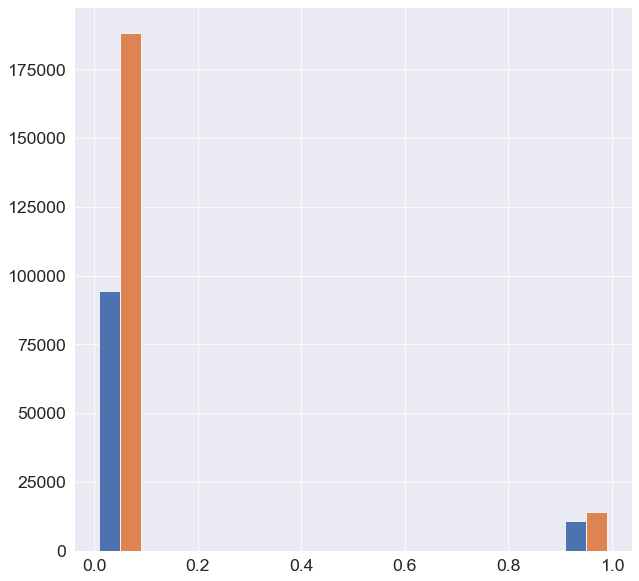

In [56]:
sns.set(style='darkgrid', rc={"grid.linewidth": 1})
sns.set_context("paper", font_scale=2)                                                  
plt.figure(figsize=(10, 10)) 
color = sns.color_palette("Set2", 9)
x1 = list(dropnull_df[dropnull_df['CODE_GENDER'] == 'M']['TARGET'])
x2 = list(dropnull_df[dropnull_df['CODE_GENDER'] == 'F']['TARGET'])
plt.hist([x1,x2])